In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-dataset/Sample_Submission.csv
/kaggle/input/food-delivery-dataset/train.csv
/kaggle/input/food-delivery-dataset/test.csv


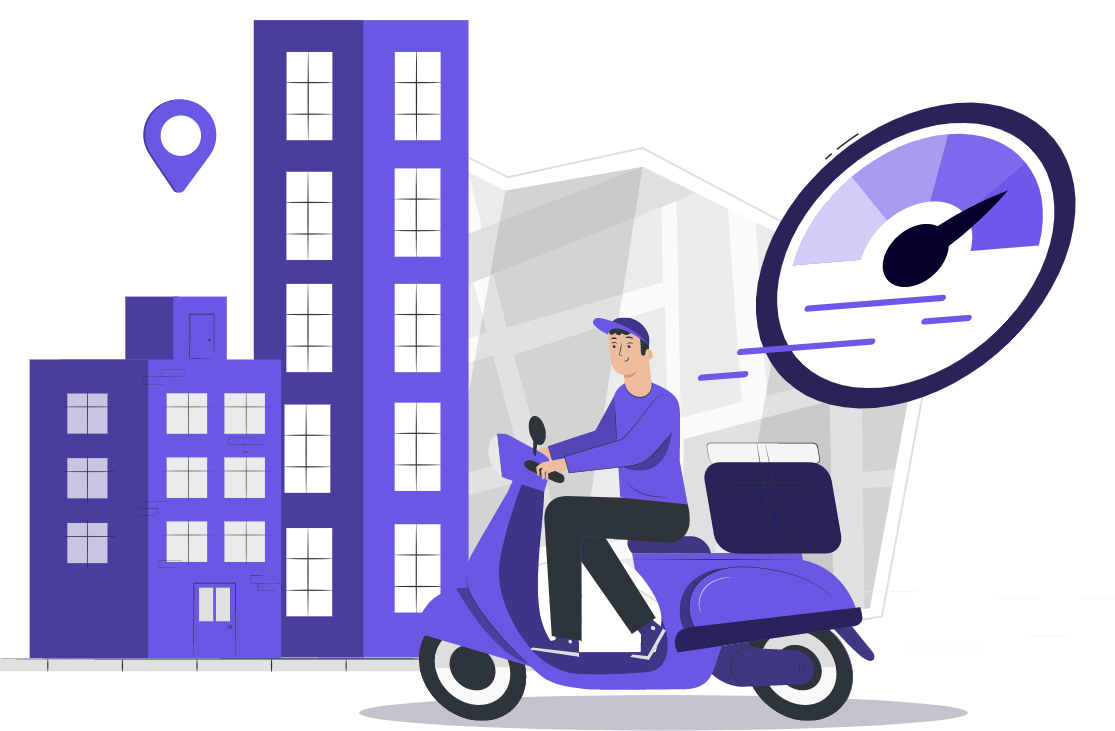

## About Dataset

Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.


## Veri Kümesi Hakkında
Yiyecek teslimi, bir restoranın, mağazanın veya bağımsız yiyecek dağıtım şirketinin bir müşteriye yiyecek teslim ettiği bir kurye hizmetidir. Sipariş genellikle bir restoran veya bakkalın web sitesi veya mobil uygulaması aracılığıyla veya bir yemek siparişi veren şirket aracılığıyla verilir. Teslim edilen ürünler mezeler, garnitürler, içecekler, tatlılar veya bakkaliye ürünlerini içerebilir ve genellikle kutularda veya torbalarda teslim edilir. Teslimat görevlisi normalde bir araba kullanır, ancak evlerin ve restoranların birbirine daha yakın olduğu daha büyük şehirlerde bisiklet veya motorlu scooter kullanabilir.



* Evaluation metric is r2_score



* model değerlendirme ölçütü r2_score

## Analysis Content 

* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[data Preprocessing](#4)
* 5.[Modelling](#5) 
* 6.[LGBM](#6) 
* 7.[LGBM](#7)
* 8.[Conclusşon](#8)



<a id="1"></a>
## 1.Python Libraries

In [173]:
#Let's load the relevant libraries (İlgili kütüphaneleri yükleyelim);

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [174]:
df=pd.read_csv("/kaggle/input/food-delivery-dataset/train.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [175]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


In [176]:
test_df=pd.read_csv("/kaggle/input/food-delivery-dataset/test.csv")
test_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [177]:
test_df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian
11398,0xb7be,CHENRES07DEL02,39,5,13.081878,80.248519,13.131878,80.298519,24-03-2022,22:20:00,22:25:00,conditions Windy,Low,2,Drinks,motorcycle,1,No,Urban


<a id="3"></a>
## 3.EDA

In [178]:
# gereksiz öznitelikleri kaldıralım(modellemeye etkisi olmayan)

df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [179]:
test_df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          11399 non-null  object 
 1   Delivery_person_Ratings      11399 non-null  object 
 2   Restaurant_latitude          11399 non-null  float64
 3   Restaurant_longitude         11399 non-null  float64
 4   Delivery_location_latitude   11399 non-null  float64
 5   Delivery_location_longitude  11399 non-null  float64
 6   Order_Date                   11399 non-null  object 
 7   Time_Orderd                  11399 non-null  object 
 8   Time_Order_picked            11399 non-null  object 
 9   Weatherconditions            11399 non-null  object 
 10  Road_traffic_density         11399 non-null  object 
 11  Vehicle_condition            11399 non-null  int64  
 12  Type_of_order                11399 non-null  object 
 13  Type_of_vehicle 

In [180]:
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [182]:
# train için (df) gerekli işlemleri/dönüşümleri yapalım;


In [183]:
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace("(min)", "")


In [184]:
df["Weatherconditions"] = df["Weatherconditions"].str.replace("conditions", "")


In [185]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,() 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,() 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,() 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,() 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,() 30


In [186]:
# gereksiz kalıpları sutunlardan attık .(min) ve condition

In [187]:
# test için;

In [188]:
test_df["Weatherconditions"] = test_df["Weatherconditions"].str.replace("conditions", "")


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [190]:
df.shape

(45593, 18)

In [191]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          11399 non-null  object 
 1   Delivery_person_Ratings      11399 non-null  object 
 2   Restaurant_latitude          11399 non-null  float64
 3   Restaurant_longitude         11399 non-null  float64
 4   Delivery_location_latitude   11399 non-null  float64
 5   Delivery_location_longitude  11399 non-null  float64
 6   Order_Date                   11399 non-null  object 
 7   Time_Orderd                  11399 non-null  object 
 8   Time_Order_picked            11399 non-null  object 
 9   Weatherconditions            11399 non-null  object 
 10  Road_traffic_density         11399 non-null  object 
 11  Vehicle_condition            11399 non-null  int64  
 12  Type_of_order                11399 non-null  object 
 13  Type_of_vehicle 

In [192]:
test_df.shape

(11399, 17)

In [193]:
# bazı verilerimiz sayısal olmasına rağmen kategorik görünüyor verisetimizde NAN değerler olabilir veya sayısal değerler "34"  şeklinde olabilir
# değerlerimizi gözlemleyelim

In [194]:
col=df.columns.to_list()

In [195]:
col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [196]:
for i in col:
    
    print(df[i].value_counts())
    print("*"*39)

35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64
***************************************
4.8     7148
4.7     7142
4.9     7041
4.6     6940
5       3996
4.5     3303
NaN     1908
4.1     1430
4.2     1418
4.3     1409
4.4     1361
4       1077
3.5      249
3.8      228
3.7      225
3.6      207
3.9      197
6         53
1         38
3.4       32
3.1       29
3.2       29
3.3       25
2.6       22
2.7       22
2.5       20
2.8       19
2.9       19
3          6
Name: Delivery_person_Ratings, dtype: int64
***************************************
 0.000000     3640
 26.911378     182
 26.914142     180
 26.892312     176
 26.902940     176
              ... 
-23.355164       1
-15.513150       1
-22.3113

In [197]:
# görüldüğü gibi verisetimizde eksik değerler görünüyor ,NAN olarak girilmiş

In [198]:
# kategorik değerler için NAN değerleri değiştirelim;

In [199]:
df["City"]=df["City"].str.replace("NaN","other")
df["multiple_deliveries"]=df["multiple_deliveries"].str.replace("NaN","1")
df["Road_traffic_density"]=df["Road_traffic_density"].str.replace("NaN","Low")
df["Festival"]=df["Festival"].str.replace("NaN","No")
df["Weatherconditions"]=df["Weatherconditions"].str.replace("NaN","other")

In [200]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [201]:
# test için gerekli işlemleri yapalım;

In [202]:
col2=test_df.columns.to_list()

In [203]:
col2

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City']

In [204]:
for i in col2:
    
    print(test_df[i].value_counts())
    print("*"*39)

30      579
28      569
33      556
20      555
38      551
21      549
37      549
29      548
34      547
35      547
32      545
26      545
24      544
27      543
23      541
39      536
31      535
22      522
36      521
25      507
NaN     491
50       10
15        9
Name: Delivery_person_Age, dtype: int64
***************************************
4.9     1863
4.8     1790
4.7     1723
4.6     1663
5        999
4.5      843
NaN      507
4.2      351
4.3      341
4.4      326
4.1      311
4        295
3.5       66
3.9       62
3.7       59
3.8       51
3.6       51
3.3       13
2.6       12
3.4       12
6         10
1          9
2.5        8
3.1        8
3.2        7
2.7        7
2.9        7
2.8        3
3          2
Name: Delivery_person_Ratings, dtype: int64
***************************************
 0.000000     870
 26.921411     54
 26.913987     52
 22.311358     52
 21.170798     52
             ... 
-25.452350      1
-11.000762      1
-26.902940      1
-23.214459      1
-19

In [205]:
# görüldüğü gibi verisetimizde eksik değerler görünüyor ,NAN olarak girilmiş

In [206]:
# kategorik değerler için NAN değerleri değiştirelim;

In [207]:
test_df["City"]=test_df["City"].str.replace("NaN","other")
test_df["multiple_deliveries"]=test_df["multiple_deliveries"].str.replace("NaN","1")
test_df["Road_traffic_density"]=test_df["Road_traffic_density"].str.replace("NaN","Low")
test_df["Festival"]=test_df["Festival"].str.replace("NaN","No")
test_df["Weatherconditions"]=test_df["Weatherconditions"].str.replace("NaN","other")

In [208]:
test_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          11399 non-null  object 
 1   Delivery_person_Ratings      11399 non-null  object 
 2   Restaurant_latitude          11399 non-null  float64
 3   Restaurant_longitude         11399 non-null  float64
 4   Delivery_location_latitude   11399 non-null  float64
 5   Delivery_location_longitude  11399 non-null  float64
 6   Order_Date                   11399 non-null  object 
 7   Time_Orderd                  11399 non-null  object 
 8   Time_Order_picked            11399 non-null  object 
 9   Weatherconditions            11399 non-null  object 
 10  Road_traffic_density         11399 non-null  object 
 11  Vehicle_condition            11399 non-null  int64  
 12  Type_of_order                11399 non-null  object 
 13  Type_of_vehicle 

In [209]:
# kategorik değerler için eksik değerleri giderdik,şimdi sayısal değişkenler için gerekli dönüşümleri yapalım

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

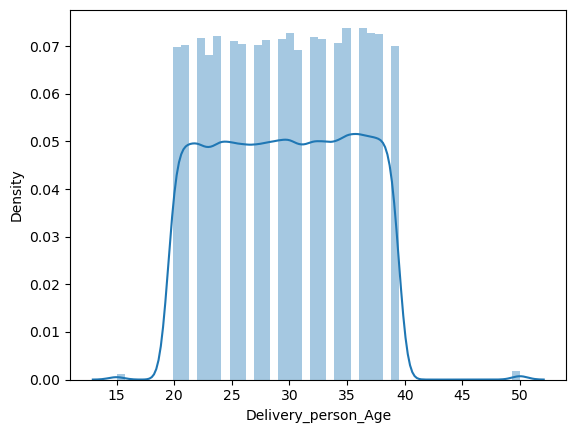

In [210]:
#Delivery_person_Age için;
sns.distplot(df.Delivery_person_Age)


In [211]:
df.Delivery_person_Age=df.Delivery_person_Age.str.replace("NaN","32")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

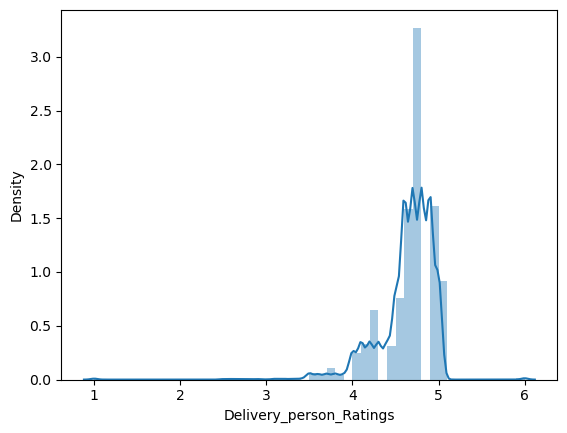

In [212]:
# Delivery_person_Ratings

sns.distplot(df.Delivery_person_Ratings)

In [213]:
# 4.7 ile dolduralım;
df.Delivery_person_Ratings=df.Delivery_person_Ratings.str.replace("NaN","4.8")
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,() 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,() 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,() 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,() 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,() 30


In [214]:
df.Time_Orderd=df.Time_Orderd.replace('NaN', float(np.nan), regex=True)


In [215]:
# "NaN" değerleri sildik,eksik değer olarak kabul edecek

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [217]:
# eksik değerleri direk silelim

In [218]:
df.dropna(subset=['Time_Orderd'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43862 non-null  object 
 1   Delivery_person_Ratings      43862 non-null  object 
 2   Restaurant_latitude          43862 non-null  float64
 3   Restaurant_longitude         43862 non-null  float64
 4   Delivery_location_latitude   43862 non-null  float64
 5   Delivery_location_longitude  43862 non-null  float64
 6   Order_Date                   43862 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            43862 non-null  object 
 9   Weatherconditions            43862 non-null  object 
 10  Road_traffic_density         43862 non-null  object 
 11  Vehicle_condition            43862 non-null  int64  
 12  Type_of_order                43862 non-null  object 
 13  Type_of_vehicle 

In [219]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,() 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,() 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,() 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,() 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,() 30


In [220]:
# test için gerekli işlemleri yapalım;

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

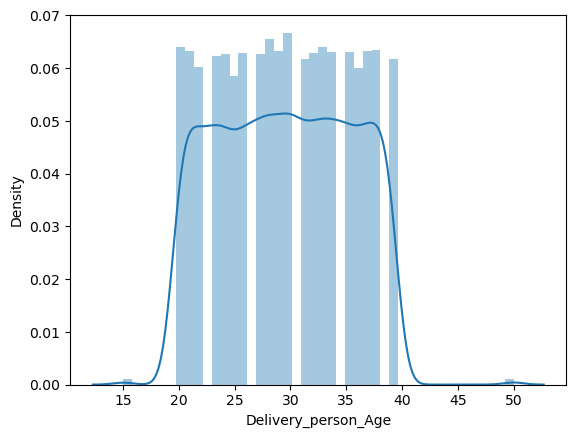

In [221]:
#Delivery_person_Age için;
sns.distplot(test_df.Delivery_person_Age)


In [222]:
test_df.Delivery_person_Age=test_df.Delivery_person_Age.str.replace("NaN","30")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43862 non-null  object 
 1   Delivery_person_Ratings      43862 non-null  object 
 2   Restaurant_latitude          43862 non-null  float64
 3   Restaurant_longitude         43862 non-null  float64
 4   Delivery_location_latitude   43862 non-null  float64
 5   Delivery_location_longitude  43862 non-null  float64
 6   Order_Date                   43862 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            43862 non-null  object 
 9   Weatherconditions            43862 non-null  object 
 10  Road_traffic_density         43862 non-null  object 
 11  Vehicle_condition            43862 non-null  int64  
 12  Type_of_order                43862 non-null  object 
 13  Type_of_vehicle 

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

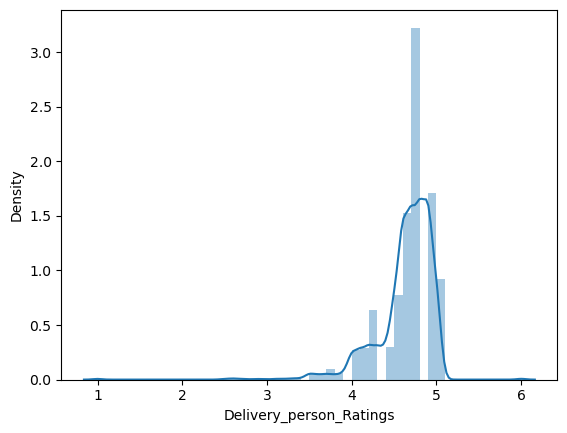

In [223]:
# Delivery_person_Ratings

sns.distplot(test_df.Delivery_person_Ratings)

In [224]:
# 4.7 ile dolduralım;
test_df.Delivery_person_Ratings=test_df.Delivery_person_Ratings.str.replace("NaN","4.8")
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,30,4.8,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,other,Low,3,Drinks,electric_scooter,1,No,Metropolitian
1,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [225]:
test_df.Time_Orderd=test_df.Time_Orderd.replace('NaN', float(np.nan), regex=True)


In [226]:
# NAN değerleri eksik olarak algılayacak

In [227]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          11399 non-null  object 
 1   Delivery_person_Ratings      11399 non-null  object 
 2   Restaurant_latitude          11399 non-null  float64
 3   Restaurant_longitude         11399 non-null  float64
 4   Delivery_location_latitude   11399 non-null  float64
 5   Delivery_location_longitude  11399 non-null  float64
 6   Order_Date                   11399 non-null  object 
 7   Time_Orderd                  10955 non-null  object 
 8   Time_Order_picked            11399 non-null  object 
 9   Weatherconditions            11399 non-null  object 
 10  Road_traffic_density         11399 non-null  object 
 11  Vehicle_condition            11399 non-null  int64  
 12  Type_of_order                11399 non-null  object 
 13  Type_of_vehicle 

In [228]:
# eksik değerleri silelim

test_df.dropna(subset=['Time_Orderd'],inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10955 entries, 1 to 11398
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          10955 non-null  object 
 1   Delivery_person_Ratings      10955 non-null  object 
 2   Restaurant_latitude          10955 non-null  float64
 3   Restaurant_longitude         10955 non-null  float64
 4   Delivery_location_latitude   10955 non-null  float64
 5   Delivery_location_longitude  10955 non-null  float64
 6   Order_Date                   10955 non-null  object 
 7   Time_Orderd                  10955 non-null  object 
 8   Time_Order_picked            10955 non-null  object 
 9   Weatherconditions            10955 non-null  object 
 10  Road_traffic_density         10955 non-null  object 
 11  Vehicle_condition            10955 non-null  int64  
 12  Type_of_order                10955 non-null  object 
 13  Type_of_vehicle 

In [229]:
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
5,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,09:45:00,09:55:00,Fog,Low,0,Drinks,motorcycle,1,No,Metropolitian


In [230]:
#eksik değerlerimizi silmiş olduk,şimdi kategorik görünen sayısal değerlerimizi sayısala dönüştürelim

In [231]:
df["Delivery_person_Age"] = pd.to_numeric(df["Delivery_person_Age"], errors= 'coerce')
df["Delivery_person_Ratings"] = pd.to_numeric(df["Delivery_person_Ratings"], errors= 'coerce')
df["multiple_deliveries"] = pd.to_numeric(df["multiple_deliveries"], errors= 'coerce')


In [232]:
df['Time_taken(min)']=df['Time_taken(min)'].str.split(" ", expand=True)[1]


In [233]:
# () ifadesini kaldırdık

In [234]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [235]:
df["Time_taken(min)"] = pd.to_numeric(df["Time_taken(min)"], errors= 'coerce')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43862 non-null  int64  
 1   Delivery_person_Ratings      43862 non-null  float64
 2   Restaurant_latitude          43862 non-null  float64
 3   Restaurant_longitude         43862 non-null  float64
 4   Delivery_location_latitude   43862 non-null  float64
 5   Delivery_location_longitude  43862 non-null  float64
 6   Order_Date                   43862 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            43862 non-null  object 
 9   Weatherconditions            43862 non-null  object 
 10  Road_traffic_density         43862 non-null  object 
 11  Vehicle_condition            43862 non-null  int64  
 12  Type_of_order                43862 non-null  object 
 13  Type_of_vehicle 

In [237]:
# test verileri için de gerekli işlemleri yapalım;

In [238]:
test_df["Delivery_person_Age"] = pd.to_numeric(test_df["Delivery_person_Age"], errors= 'coerce')
test_df["Delivery_person_Ratings"] = pd.to_numeric(test_df["Delivery_person_Ratings"], errors= 'coerce')
test_df["multiple_deliveries"] = pd.to_numeric(test_df["multiple_deliveries"], errors= 'coerce')


In [239]:
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
5,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,09:45:00,09:55:00,Fog,Low,0,Drinks,motorcycle,1,No,Metropolitian


In [240]:
# kategorik görünümlü sayısal değişkenleri sayısale dönüştürdük

In [241]:
# istatistiksel özeti gözlemleyelim;
df.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,15%,25%,35%,50%,65%,75%,90%,max
Delivery_person_Age,43862.0,29.566937,5.749934,20.000000,23.000000,25.000000,27.000000,30.000000,33.000000,35.000000,37.000000,39.000000
Delivery_person_Ratings,43862.0,4.636293,0.313129,2.500000,4.300000,4.500000,4.600000,4.700000,4.800000,4.900000,4.900000,5.000000
Restaurant_latitude,43862.0,17.241971,7.698686,-30.902872,11.022169,12.933298,13.054347,18.554382,21.173493,22.732225,26.888420,30.914057
Restaurant_longitude,43862.0,70.764932,21.136195,0.000000,72.813287,73.170283,75.752820,75.898497,76.999594,78.045359,80.275235,88.433452
Delivery_location_latitude,43862.0,17.462466,7.338540,0.010000,11.104839,12.986229,13.128616,18.633934,21.247729,22.785049,26.922328,31.054057
Delivery_location_longitude,43862.0,70.828527,21.136365,0.010000,72.875203,73.279312,75.782820,75.999490,77.086415,78.104095,80.365235,88.563452
Vehicle_condition,43862.0,1.000889,0.816557,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
multiple_deliveries,43862.0,0.749624,0.567594,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
Time_taken(min),43862.0,26.293831,9.373765,10.000000,16.000000,19.000000,22.000000,26.000000,29.000000,32.000000,40.000000,54.000000


In [242]:
# test için istatistiksel özeti gözlemleyelim;

test_df.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,15%,25%,35%,50%,65%,75%,90%,max
Delivery_person_Age,10955.0,29.513373,5.736474,20.000000,23.000000,25.000000,27.000000,30.000000,32.000000,34.000000,37.000000,39.000000
Delivery_person_Ratings,10955.0,4.635774,0.324594,2.500000,4.300000,4.500000,4.600000,4.700000,4.800000,4.900000,4.900000,5.000000
Restaurant_latitude,10955.0,17.355682,7.643640,-30.902872,11.022298,12.934179,13.058616,18.554382,21.175104,22.744648,26.888420,30.914057
Restaurant_longitude,10955.0,71.070443,20.633911,0.000000,72.825203,73.749285,75.752891,75.898497,76.998349,78.046106,80.275235,88.433452
Delivery_location_latitude,10955.0,17.575249,7.280599,0.010000,11.113681,12.992532,13.136439,18.642718,21.253440,22.791413,26.923726,31.054057
Delivery_location_longitude,10955.0,71.134088,20.634775,0.010000,72.878731,73.780087,75.802891,75.996959,77.085525,78.104468,80.363110,88.563452
Vehicle_condition,10955.0,1.007029,0.817602,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
multiple_deliveries,10955.0,0.755089,0.568793,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [243]:
#şimdi bazı analizler yaparak çıkarımlarda bulunalım;

In [244]:
df.sort_values("Delivery_person_Ratings",ascending=False).head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
27625,34,5.0,0.000000,0.000000,0.050000,0.050000,15-03-2022,21:30:00,21:40:00,Cloudy,Jam,2,Drinks,motorcycle,1,No,Metropolitian,25
26593,25,5.0,11.001852,76.976268,11.071852,77.046268,31-03-2022,17:15:00,17:20:00,Cloudy,Medium,1,Meal,motorcycle,1,No,Metropolitian,35
26538,20,5.0,19.120083,72.907385,19.230083,73.017385,18-03-2022,23:30:00,23:40:00,Fog,Low,0,Meal,motorcycle,0,No,Urban,20
26550,30,5.0,26.479108,80.315042,26.609108,80.445042,12-02-2022,21:10:00,21:25:00,Cloudy,Jam,2,Snack,electric_scooter,1,No,Metropolitian,41
26555,36,5.0,21.173493,72.801953,21.223493,72.851953,11-03-2022,17:20:00,17:35:00,Windy,Medium,2,Meal,scooter,1,No,Metropolitian,27
5231,36,5.0,12.970324,77.645748,13.010324,77.685748,11-03-2022,16:15:00,16:20:00,Cloudy,Medium,1,Meal,motorcycle,0,No,Urban,17
5229,20,5.0,11.003681,76.975525,11.053681,77.025525,01-03-2022,20:10:00,20:25:00,Sunny,Jam,2,Meal,electric_scooter,0,No,Urban,12
26573,34,5.0,12.978453,77.643685,13.058453,77.723685,06-03-2022,18:50:00,19:00:00,Cloudy,Medium,0,Meal,motorcycle,2,No,Metropolitian,41
26579,28,5.0,22.312790,73.170283,22.362790,73.220283,19-03-2022,17:40:00,17:55:00,Stormy,Medium,0,Buffet,motorcycle,1,No,Metropolitian,12
26581,28,5.0,22.695207,75.866059,22.745207,75.916059,30-03-2022,17:50:00,17:55:00,Windy,Medium,2,Drinks,motorcycle,1,No,Metropolitian,28


In [245]:
df.sort_values("Delivery_person_Ratings",ascending=True).head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
7924,23,2.5,12.933298,77.614293,13.023298,77.704293,16-03-2022,23:25:00,23:35:00,Sunny,Low,2,Buffet,scooter,1,No,Urban,36
934,29,2.5,0.000000,0.000000,0.090000,0.090000,18-02-2022,22:55:00,23:05:00,Sunny,Low,2,Drinks,scooter,1,Yes,Metropolitian,41
32063,20,2.5,13.027018,80.254791,13.137018,80.364791,08-03-2022,23:20:00,23:30:00,Sunny,Low,2,Snack,scooter,0,No,Metropolitian,31
37620,26,2.5,18.551440,73.804855,18.621440,73.874855,14-03-2022,22:15:00,22:25:00,Sunny,Low,2,Drinks,electric_scooter,1,No,Metropolitian,36
2692,29,2.5,13.091809,80.219104,13.201809,80.329104,25-03-2022,22:40:00,22:55:00,Sunny,Low,1,Snack,motorcycle,2,No,Metropolitian,35
33079,23,2.5,11.001753,76.986241,11.071753,77.056241,08-03-2022,23:55:00,00:00:00,Sunny,Low,2,Drinks,scooter,1,No,Metropolitian,35
10165,22,2.5,23.371292,85.327872,23.441292,85.397872,02-03-2022,22:15:00,22:25:00,Sunny,Low,2,Buffet,motorcycle,1,No,Metropolitian,35
26715,28,2.5,26.905287,75.794592,27.015287,75.904592,14-03-2022,22:25:00,22:40:00,Sunny,Low,2,Snack,scooter,1,Yes,Urban,43
2818,29,2.5,18.569156,73.774723,18.699156,73.904723,20-03-2022,22:25:00,22:35:00,Sunny,Low,2,Meal,scooter,1,No,Metropolitian,44
35709,21,2.5,12.913041,77.683237,12.983041,77.753237,04-03-2022,22:25:00,22:35:00,Sunny,Low,2,Meal,motorcycle,1,No,Metropolitian,42


In [246]:
# Çıkarımlar;
# en yüksek puan alan teslimatçılar genelde siparişi daha erken ulaştırmışlar.
# metropol şehirlerde geç ulaştırıldığında bile trafik yoğunluğu göz önüne alınarak müşteri memnuniyeti sağlanmış,Ancak trafiğin yoğun olmadığı
# bölgelerde müşteriden düşük puan alınmıştır.
# genelde yüksek puan alan kuryeler yaşça daha büyük kuryelerdir,düşük puan alanlar 29 yaş altı genelde


In [247]:
df.sort_values("Time_taken(min)",ascending=False).head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
20589,29,4.2,23.374878,85.335739,23.404878,85.365739,11-03-2022,21:10:00,21:15:00,Sunny,Jam,0,Snack,motorcycle,2,No,Metropolitian,54
16570,35,4.5,11.001852,76.976268,11.091852,77.066268,02-03-2022,19:45:00,20:00:00,Fog,Jam,0,Buffet,motorcycle,3,No,Semi-Urban,54
33947,32,4.1,13.086438,80.220672,13.216439,80.350672,02-04-2022,21:20:00,21:25:00,Sandstorms,Jam,0,Meal,motorcycle,1,Yes,Metropolitian,54
33652,34,4.2,30.899992,75.831338,30.969992,75.901338,14-02-2022,21:25:00,21:40:00,Sandstorms,Jam,0,Buffet,motorcycle,3,No,Metropolitian,54
33644,39,4.5,0.000000,0.000000,0.110000,0.110000,27-03-2022,21:20:00,21:25:00,Cloudy,Jam,0,Buffet,motorcycle,0,No,Metropolitian,54
12626,39,4.4,23.359194,85.325447,23.449194,85.415447,27-03-2022,19:55:00,20:05:00,Windy,Jam,0,Drinks,motorcycle,3,Yes,Metropolitian,54
32369,22,4.1,23.369746,85.339820,23.419746,85.389820,17-03-2022,19:25:00,19:30:00,Sunny,Jam,0,Buffet,motorcycle,3,No,Metropolitian,54
3103,39,4.7,26.911378,75.789034,27.021378,75.899034,23-03-2022,21:45:00,21:55:00,Fog,Jam,0,Buffet,motorcycle,3,Yes,Semi-Urban,54
13063,31,4.0,21.173343,72.792731,21.263343,72.882731,12-03-2022,19:25:00,19:35:00,Windy,Jam,0,Drinks,motorcycle,1,No,Urban,54
12127,35,4.1,22.760072,75.892574,22.870072,76.002574,29-03-2022,20:10:00,20:20:00,Windy,Jam,0,Snack,motorcycle,3,No,Semi-Urban,54


In [248]:
df.sort_values("Time_taken(min)",ascending=True).head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
8927,29,4.9,13.064181,80.236442,13.124181,80.296442,01-03-2022,23:15:00,23:20:00,Sandstorms,Low,2,Drinks,scooter,1,No,Urban,10
18862,24,4.5,17.431477,78.400350,17.451477,78.420350,21-03-2022,08:10:00,08:20:00,Windy,Low,1,Snack,motorcycle,0,No,Urban,10
43026,27,4.8,22.695207,75.866059,22.825207,75.996059,14-03-2022,22:40:00,22:50:00,Stormy,Low,2,Meal,electric_scooter,1,No,Metropolitian,10
33169,20,4.6,0.000000,0.000000,0.050000,0.050000,15-02-2022,22:25:00,22:30:00,Fog,Low,1,Meal,motorcycle,0,No,Metropolitian,10
9622,24,4.8,22.732225,75.874765,22.772225,75.914765,09-03-2022,15:50:00,16:00:00,Cloudy,Medium,1,Drinks,scooter,0,No,Urban,10
9623,39,4.8,18.533811,73.899315,18.553811,73.919315,01-03-2022,08:55:00,09:10:00,Sunny,Low,1,Snack,motorcycle,0,No,Metropolitian,10
33146,25,4.9,30.893081,75.821495,30.923081,75.851495,11-02-2022,22:45:00,22:50:00,Stormy,Low,2,Drinks,scooter,0,No,Urban,10
9639,29,4.7,12.975377,77.696664,13.105377,77.826664,04-03-2022,23:50:00,00:00:00,Sandstorms,Low,2,Drinks,scooter,1,No,Urban,10
9644,21,4.7,0.000000,0.000000,0.050000,0.050000,15-03-2022,20:20:00,20:35:00,Sunny,Jam,2,Meal,motorcycle,0,No,Urban,10
33114,21,4.7,22.744648,75.894377,22.794648,75.944377,28-03-2022,20:10:00,20:15:00,Windy,Jam,2,Drinks,scooter,1,No,Urban,10


In [249]:
# Çıkarımlar;
# sipariş en erken 10 ,en geç 54 dakikada teslim edilmiş
# sipariş genelde trafiğin yoğun olduğu yerlerde geç,trafiğin yoğunluğunun az olduğu yerlerde erken teslim edilmiş.
# teslimat sayısı(multiple_deliveries) arttıkça ,teslim edilme süresi genelde artmış


In [250]:
df.groupby("Weatherconditions")["Time_taken(min)","Delivery_person_Age","Delivery_person_Ratings"].describe().T

Weatherconditions                   Cloudy          Fog   Sandstorms  \
Time_taken(min)         count  7339.000000  7476.000000  7285.000000   
                        mean     28.939638    28.931915    25.890734   
                        std      10.081098    10.136792     8.586855   
                        min      10.000000    10.000000    10.000000   
                        25%      20.000000    20.000000    20.000000   
                        50%      29.000000    28.500000    26.000000   
                        75%      37.000000    37.000000    31.000000   
                        max      54.000000    54.000000    54.000000   
Delivery_person_Age     count  7339.000000  7476.000000  7285.000000   
                        mean     29.624199    29.445158    29.550858   
                        std       5.696723     5.792285     5.661590   
                        min      20.000000    20.000000    20.000000   
                        25%      25.000000    24.000000    25.000000   
                        50%      30.000000    29.000000    30.000000   
                        75%      35.000000    34.000000    34.000000   
                        max      39.000000    39.000000    39.000000   
Delivery_person_Ratings count  7339.000000  7476.000000  7285.000000   
                        mean      4.653808     4.654922     4.614907   
                        std       0.279079     0.272776     0.308546   
                        min       3.500000     3.500000     3.500000   
                        25%       4.600000     4.600000     4.500000   
                        50%       4.700000     4.700000     4.700000   
                        75%       4.900000     4.900000     4.800000   
                        max       5.000000     5.000000     5.000000   

Weatherconditions                   Stormy        Sunny        Windy  
Time_taken(min)         count  7402.000000  7109.000000  7251.000000  
                        mean     25.858552    21.847517    26.104537  
                        std       8.462806     8.296055     8.606211  
                        min      10.000000    10.000000    10.000000  
                        25%      20.000000    16.000000    20.000000  
                        50%      26.000000    20.000000    26.000000  
                        75%      31.000000    26.000000    31.000000  
                        max      54.000000    54.000000    54.000000  
Delivery_person_Age     count  7402.000000  7109.000000  7251.000000  
                        mean     29.630911    29.638486    29.515239  
                        std       5.766403     5.771012     5.809256  
                        min      20.000000    20.000000    20.000000  
                        25%      25.000000    25.000000    24.000000  
                        50%      30.000000    30.000000    30.000000  
                        75%      35.000000    35.000000    35.000000  
                        max      39.000000    39.000000    39.000000  
Delivery_person_Ratings count  7402.000000  7109.000000  7251.000000  
                        mean      4.615388     4.660262     4.618687  
                        std       0.310601     0.390194     0.302969  
                        min       3.500000     2.500000     3.500000  
                        25%       4.500000     4.600000     4.500000  
                        50%       4.700000     4.700000     4.700000  
                        75%       4.800000     4.900000     4.800000  
                        max       5.000000     5.000000     5.000000

In [251]:
# Çıkarımlar

# Güneşli havada siparişler daha erken teslim edilmiş
# Bulutlu,rüzgarlı ve kum fırtınasının olduğu havalarda genelde daha geç teslimat yapılmış

In [252]:
df.groupby("Road_traffic_density")["Time_taken(min)","Delivery_person_Age","Delivery_person_Ratings"].describe().T

Road_traffic_density                 High           Jam           Low   \
Time_taken(min)         count  4322.000000  13800.000000  15062.000000   
                        mean     27.208468     31.154348     21.277453   
                        std       8.359781      9.938222      6.802006   
                        min      10.000000     10.000000     10.000000   
                        25%      22.000000     24.000000     16.000000   
                        50%      27.000000     31.000000     20.000000   
                        75%      32.000000     39.000000     26.000000   
                        max      54.000000     54.000000     44.000000   
Delivery_person_Age     count  4322.000000  13800.000000  15062.000000   
                        mean     29.647617     29.569348     29.564998   
                        std       5.727482      5.736260      5.764045   
                        min      20.000000     20.000000     20.000000   
                        25%      25.000000     25.000000     25.000000   
                        50%      30.000000     30.000000     30.000000   
                        75%      35.000000     35.000000     35.000000   
                        max      39.000000     39.000000     39.000000   
Delivery_person_Ratings count  4322.000000  13800.000000  15062.000000   
                        mean      4.655576      4.597312      4.648427   
                        std       0.271048      0.327783      0.333297   
                        min       3.500000      3.500000      2.500000   
                        25%       4.600000      4.500000      4.600000   
                        50%       4.700000      4.700000      4.700000   
                        75%       4.900000      4.800000      4.900000   
                        max       5.000000      5.000000      5.000000   

Road_traffic_density                Medium   
Time_taken(min)         count  10678.000000  
                        mean      26.717925  
                        std        8.556302  
                        min       10.000000  
                        25%       20.000000  
                        50%       27.000000  
                        75%       33.000000  
                        max       49.000000  
Delivery_person_Age     count  10678.000000  
                        mean      29.533901  
                        std        5.757202  
                        min       20.000000  
                        25%       25.000000  
                        50%       30.000000  
                        75%       35.000000  
                        max       39.000000  
Delivery_person_Ratings count  10678.000000  
                        mean       4.661753  
                        std        0.272999  
                        min        3.500000  
                        25%        4.600000  
                        50%        4.700000  
                        75%        4.900000  
                        max        5.000000

In [253]:
# trafik yoğunluğunun çok olduğu yerlerde teslimat geç yapılmış


In [254]:
df.Type_of_order.value_counts()

Snack      11091
Meal       11018
Drinks     10897
Buffet     10856
Name: Type_of_order, dtype: int64

In [255]:
# En çok sipariş edilen yiyecek grubu atıştırmalıktır,daha sonra sırasıyla yemek-içecek-büfe şeklindedir

In [256]:
df.groupby("Type_of_vehicle")["Time_taken(min)","Delivery_person_Age","Delivery_person_Ratings"].describe().T                              


Type_of_vehicle                electric_scooter    motorcycle       scooter 
Time_taken(min)         count        3534.000000  25633.000000  14695.000000
                        mean           24.407187     27.600905     24.467574
                        std             8.561974      9.634162      8.693354
                        min            10.000000     10.000000     10.000000
                        25%            17.000000     20.000000     17.000000
                        50%            24.000000     26.000000     24.000000
                        75%            30.000000     34.000000     30.000000
                        max            49.000000     54.000000     49.000000
Delivery_person_Age     count        3534.000000  25633.000000  14695.000000
                        mean           29.661856     29.571646     29.535897
                        std             5.758930      5.744212      5.757856
                        min            20.000000     20.000000     20.000000
                        25%            25.000000     25.000000     25.000000
                        50%            30.000000     30.000000     30.000000
                        75%            35.000000     35.000000     35.000000
                        max            39.000000     39.000000     39.000000
Delivery_person_Ratings count        3534.000000  25633.000000  14695.000000
                        mean            4.650198      4.628565      4.646431
                        std             0.312751      0.305535      0.325673
                        min             2.500000      2.500000      2.500000
                        25%             4.600000      4.500000      4.600000
                        50%             4.700000      4.700000      4.700000
                        75%             4.900000      4.800000      4.900000
                        max             5.000000      5.000000      5.000000

In [257]:
# motorbisiklet ile yapılan teslimatlar geç teslim edilirken,elektrikli skoterlarla yapılan teslimatlar daha erken teslim edilmiş


In [258]:
#  burada yapmamız gereken datatime işlemleri uygulamak ,şimdi gerekli işlemleri yapalım;

In [259]:
# datatime işlemlerini uygulayalım;
from datetime import datetime 

In [260]:
df["Order_Date"] = pd.to_datetime(df.Order_Date)

df['year'] = df['Order_Date'].dt.year 
df['month'] = df['Order_Date'].dt.month 
df["day"]=df["Order_Date"].dt.day



In [261]:
# Order_Date için gerekli dönüşümleri yaptık, şimdi Time_Orderd ve Time_Order_picked için gerekli dönüşümleri yapalım

In [262]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,day
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,2,Snack,motorcycle,0,No,Urban,24,2022,3,19
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,2,Snack,scooter,1,No,Metropolitian,33,2022,3,25
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,0,Drinks,motorcycle,1,No,Urban,26,2022,3,19
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,Sunny,...,0,Buffet,motorcycle,1,No,Metropolitian,21,2022,5,4
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,Snack,scooter,1,No,Metropolitian,30,2022,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,...,1,Meal,motorcycle,0,No,Metropolitian,32,2022,3,24
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,...,0,Buffet,motorcycle,1,No,Metropolitian,36,2022,2,16
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50:00,00:05:00,Cloudy,...,1,Drinks,scooter,0,No,Metropolitian,16,2022,11,3
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35:00,13:40:00,Cloudy,...,0,Snack,motorcycle,1,No,Metropolitian,26,2022,7,3


In [263]:
df["Time_Orderd"] = pd.to_datetime(df.Time_Orderd)

df['time_ord_hour'] = df['Time_Orderd'].dt.hour 
df['time_ord_minute'] = df['Time_Orderd'].dt.minute


In [264]:
df["Time_Order_picked"] = pd.to_datetime(df.Time_Order_picked)

df['time_order_picked_hour'] = df['Time_Order_picked'].dt.hour 
df['time_order_picked_minute'] = df['Time_Order_picked'].dt.minute


In [265]:
#gerekli dönüşümleri yaptık şimdi gereksiz kolonları atalım;

In [266]:
df.drop(["Time_Orderd","Time_Order_picked","Order_Date"],axis=1,inplace=True)

In [267]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,No,Urban,24,2022,3,19,11,30,11,45
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,No,Metropolitian,33,2022,3,25,19,45,19,50
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,No,Urban,26,2022,3,19,8,30,8,45
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,No,Metropolitian,21,2022,5,4,18,0,18,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,No,Metropolitian,30,2022,3,26,13,30,13,45


In [268]:
# şimdi test verileri için aynı işlemleri uygulayalım;

In [269]:
test_df["Order_Date"] = pd.to_datetime(test_df.Order_Date)

test_df['year'] = test_df['Order_Date'].dt.year 
test_df['month'] = test_df['Order_Date'].dt.month 
test_df["day"]=test_df["Order_Date"].dt.day

test_df["Time_Orderd"] = pd.to_datetime(test_df.Time_Orderd)

test_df['time_ord_hour'] = test_df['Time_Orderd'].dt.hour 
test_df['time_ord_minute'] = test_df['Time_Orderd'].dt.minute
test_df["Time_Order_picked"] = pd.to_datetime(test_df.Time_Order_picked)

test_df['time_order_picked_hour'] = test_df['Time_Order_picked'].dt.hour 
test_df['time_order_picked_minute'] = test_df['Time_Order_picked'].dt.minute


In [270]:
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,multiple_deliveries,Festival,City,year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
1,28,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,2023-07-15 20:30:00,2023-07-15 20:35:00,Windy,...,1,No,Metropolitian,2022,3,29,20,30,20,35
2,23,4.5,26.911378,75.789034,27.001378,75.879034,2022-10-03,2023-07-15 19:35:00,2023-07-15 19:45:00,Stormy,...,1,No,Metropolitian,2022,10,3,19,35,19,45
3,21,4.8,26.766536,75.837333,26.856536,75.927333,2022-02-04,2023-07-15 17:15:00,2023-07-15 17:20:00,Fog,...,1,No,Metropolitian,2022,2,4,17,15,17,20
4,31,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,2023-07-15 18:25:00,2023-07-15 18:40:00,Sunny,...,1,No,Metropolitian,2022,3,27,18,25,18,40
5,26,4.7,15.569600,73.742294,15.579600,73.752294,2022-02-15,2023-07-15 09:45:00,2023-07-15 09:55:00,Fog,...,1,No,Metropolitian,2022,2,15,9,45,9,55


In [271]:
# gereksiz kolonları atalım;

In [272]:
test_df.drop(["Time_Orderd","Time_Order_picked","Order_Date"],axis=1,inplace=True)

In [273]:
test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
1,28,4.6,12.975377,77.696664,13.085377,77.806664,Windy,Jam,0,Snack,...,1,No,Metropolitian,2022,3,29,20,30,20,35
2,23,4.5,26.911378,75.789034,27.001378,75.879034,Stormy,Jam,0,Drinks,...,1,No,Metropolitian,2022,10,3,19,35,19,45
3,21,4.8,26.766536,75.837333,26.856536,75.927333,Fog,Medium,1,Meal,...,1,No,Metropolitian,2022,2,4,17,15,17,20
4,31,4.6,12.986047,80.218114,13.096047,80.328114,Sunny,Medium,2,Drinks,...,1,No,Metropolitian,2022,3,27,18,25,18,40
5,26,4.7,15.569600,73.742294,15.579600,73.752294,Fog,Low,0,Drinks,...,1,No,Metropolitian,2022,2,15,9,45,9,55


<a id="4"></a>
## 4.Data Preprocessing

In [274]:
# eksik değer var mı yok mu sorgulayalım;

In [275]:
df.isna().sum().sum()

0

In [276]:
test_df.isna().sum().sum()

0

In [277]:
# eksik değer problemini giderdiğimizden emin olduk

In [278]:
# sayısal ve kategorik değerler için birer liste oluşturalım;

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43862 non-null  int64  
 1   Delivery_person_Ratings      43862 non-null  float64
 2   Restaurant_latitude          43862 non-null  float64
 3   Restaurant_longitude         43862 non-null  float64
 4   Delivery_location_latitude   43862 non-null  float64
 5   Delivery_location_longitude  43862 non-null  float64
 6   Weatherconditions            43862 non-null  object 
 7   Road_traffic_density         43862 non-null  object 
 8   Vehicle_condition            43862 non-null  int64  
 9   Type_of_order                43862 non-null  object 
 10  Type_of_vehicle              43862 non-null  object 
 11  multiple_deliveries          43862 non-null  int64  
 12  Festival                     43862 non-null  object 
 13  City            

In [280]:
num_list=[i for i in df.select_dtypes(["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

In [281]:
cat_list

['Weatherconditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [282]:
num_list

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken(min)',
 'year',
 'month',
 'day',
 'time_ord_hour',
 'time_ord_minute',
 'time_order_picked_hour',
 'time_order_picked_minute']

In [283]:
# sayısal değişkenlerin dağılım durumuna bakalım;

<Figure size 640x480 with 0 Axes>

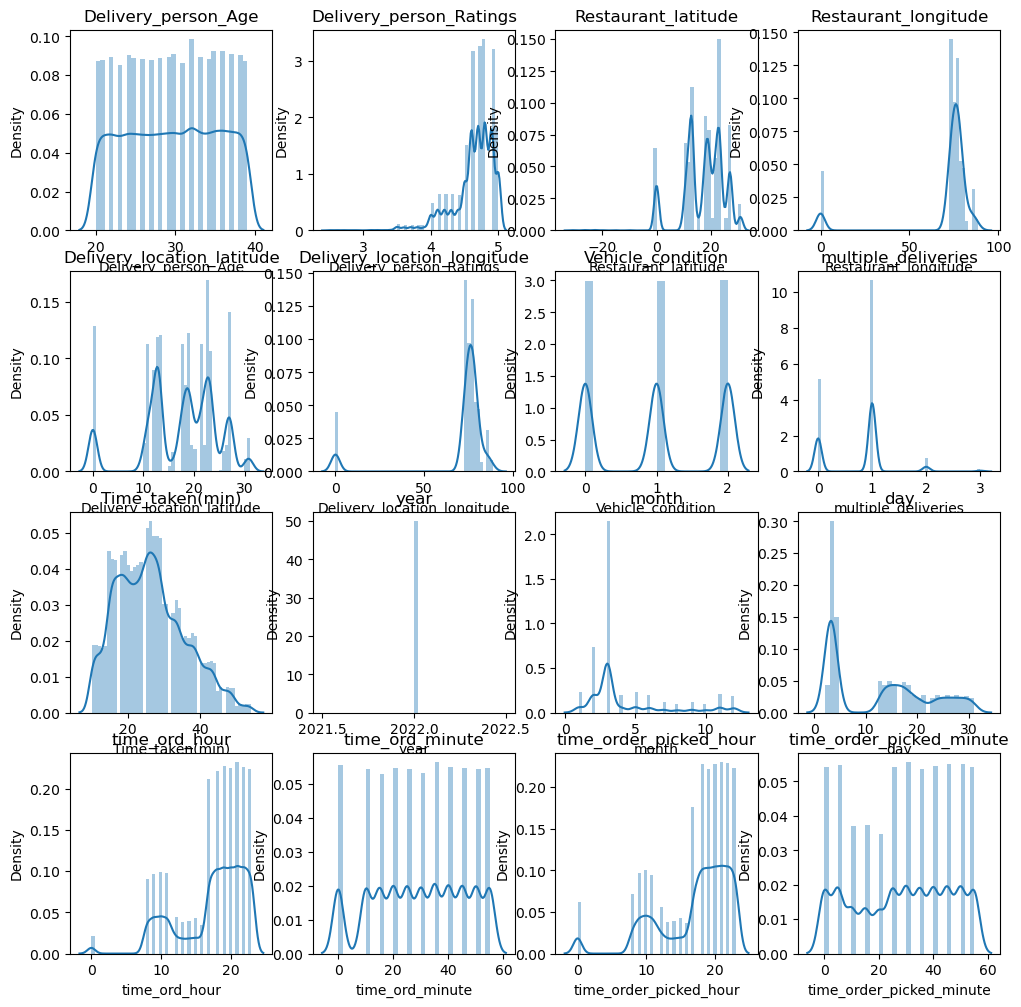

In [284]:
k=1
plt.tight_layout()
plt.figure(figsize=(12,12))

for i in df.loc[:,num_list]:
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1


In [285]:
# describe yöntemi ile incelediğimizde aykırı değerin çok bariz bir şekilde belirgin olmadığını gözlemledik,aykırı değer analizi yapmayacağız

In [286]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,No,Urban,24,2022,3,19,11,30,11,45
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,No,Metropolitian,33,2022,3,25,19,45,19,50
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,No,Urban,26,2022,3,19,8,30,8,45
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,No,Metropolitian,21,2022,5,4,18,0,18,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,No,Metropolitian,30,2022,3,26,13,30,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,No,Metropolitian,32,2022,3,24,11,35,11,45
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,No,Metropolitian,36,2022,2,16,19,55,20,10
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,No,Metropolitian,16,2022,11,3,23,50,0,5
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,No,Metropolitian,26,2022,7,3,13,35,13,40


In [287]:
# Veri görselleştirme

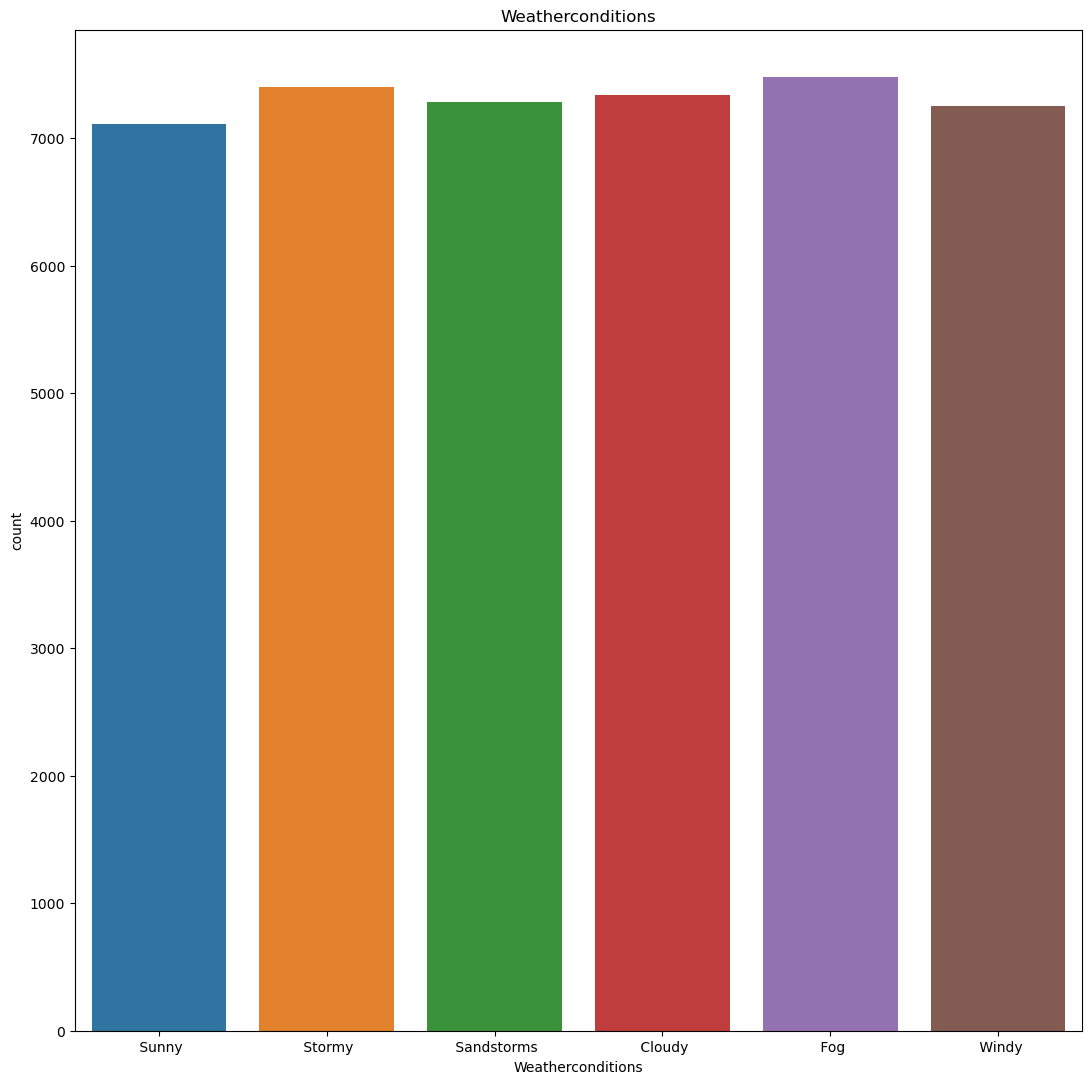

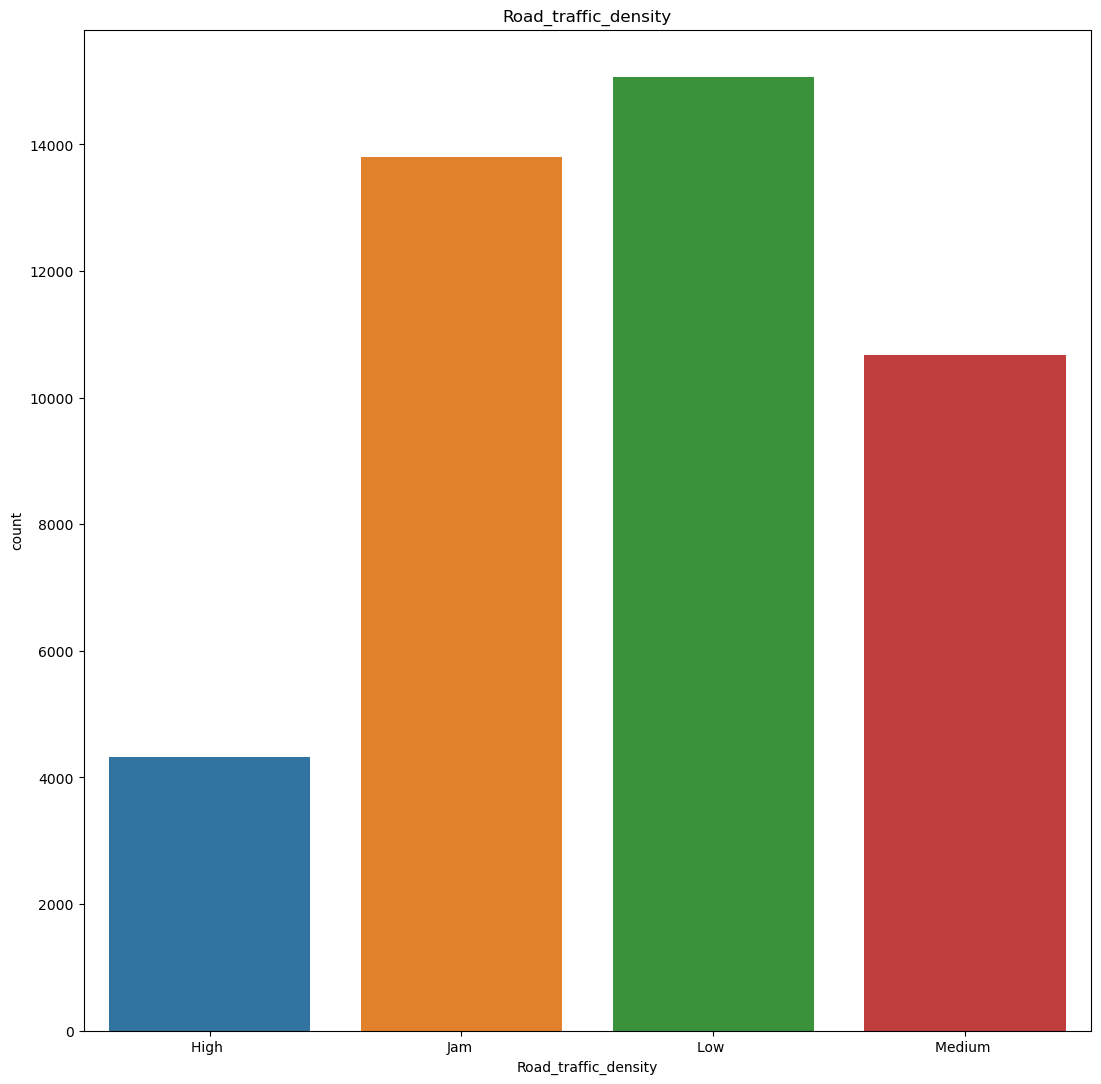

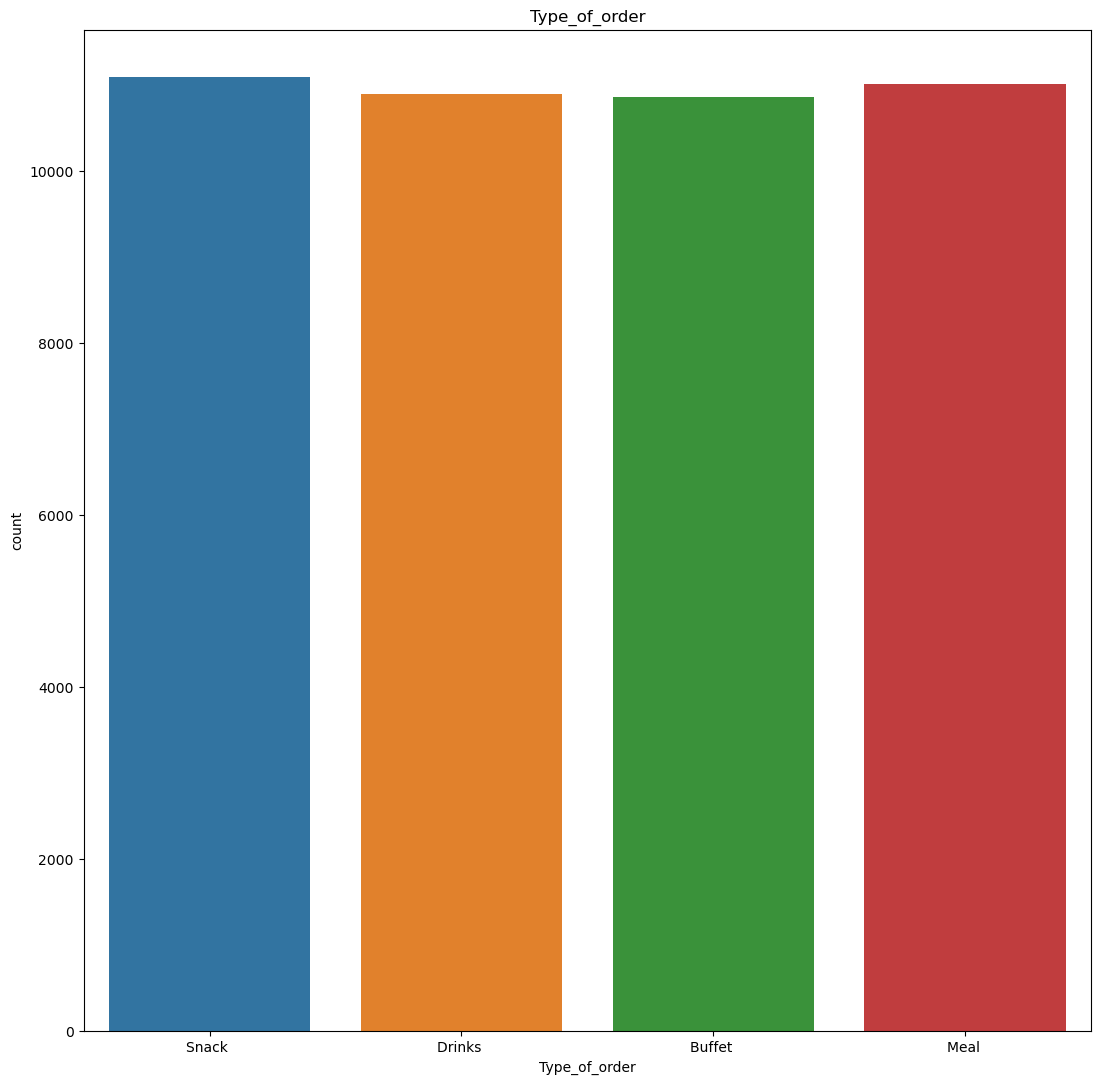

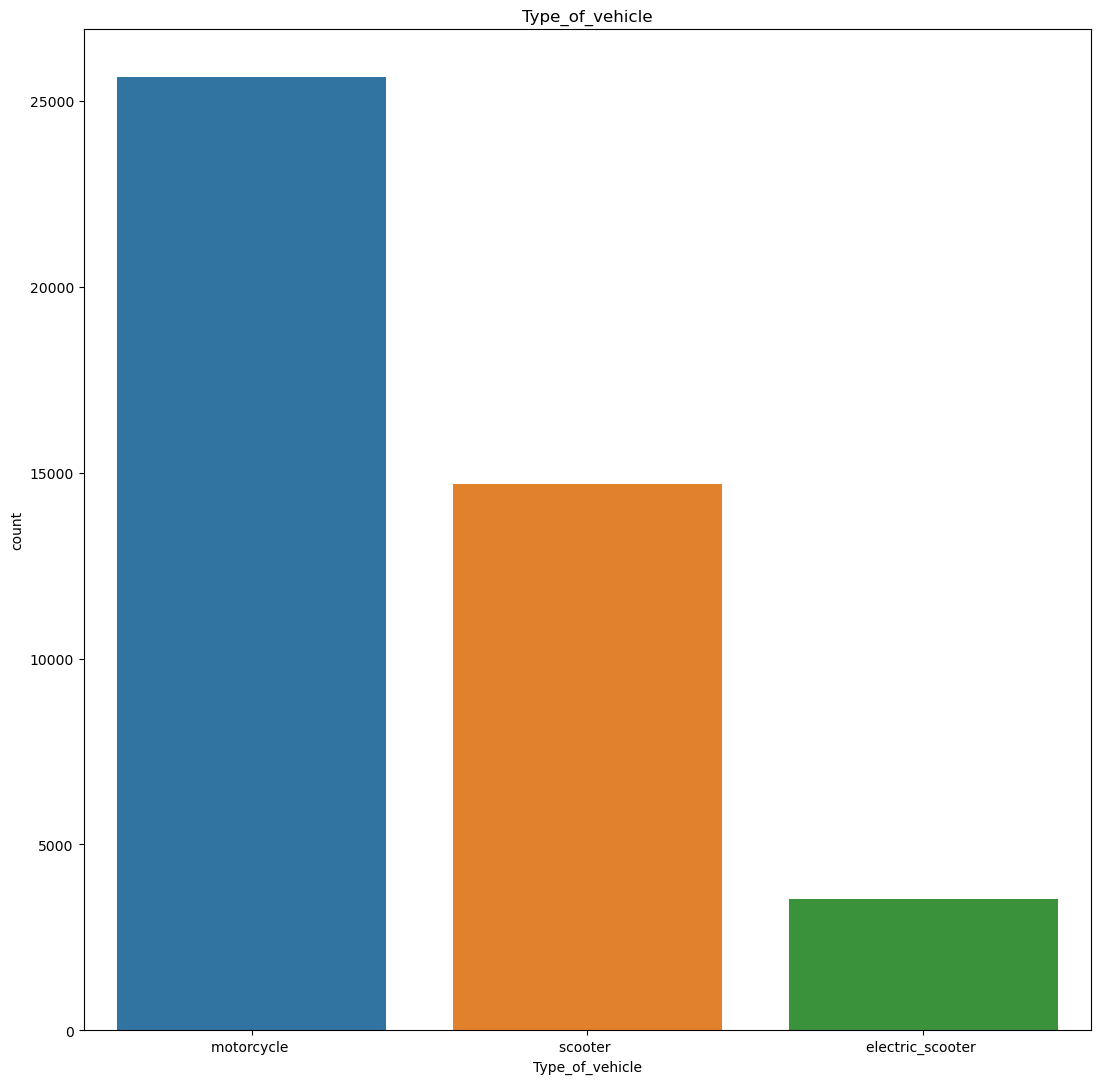

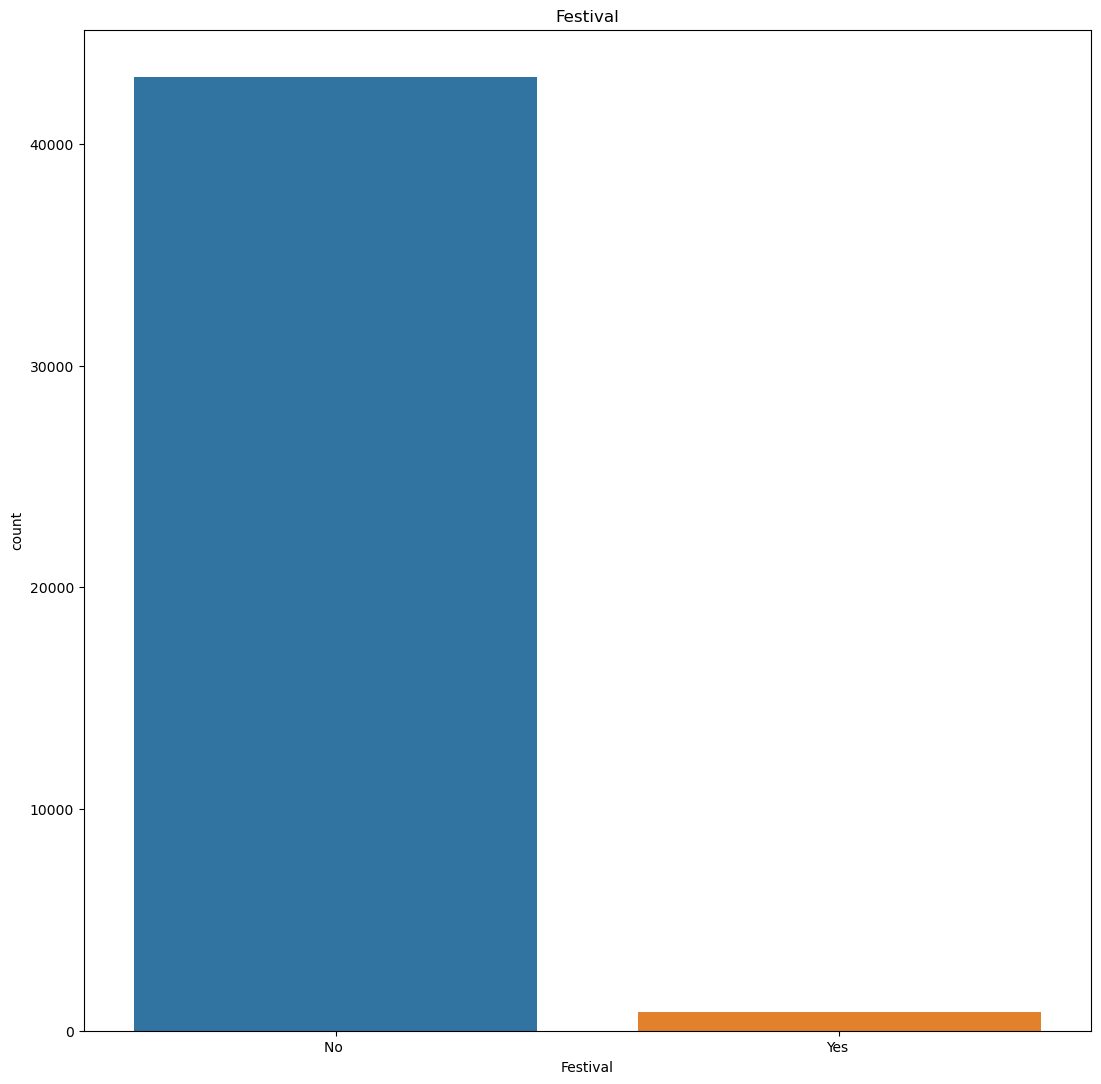

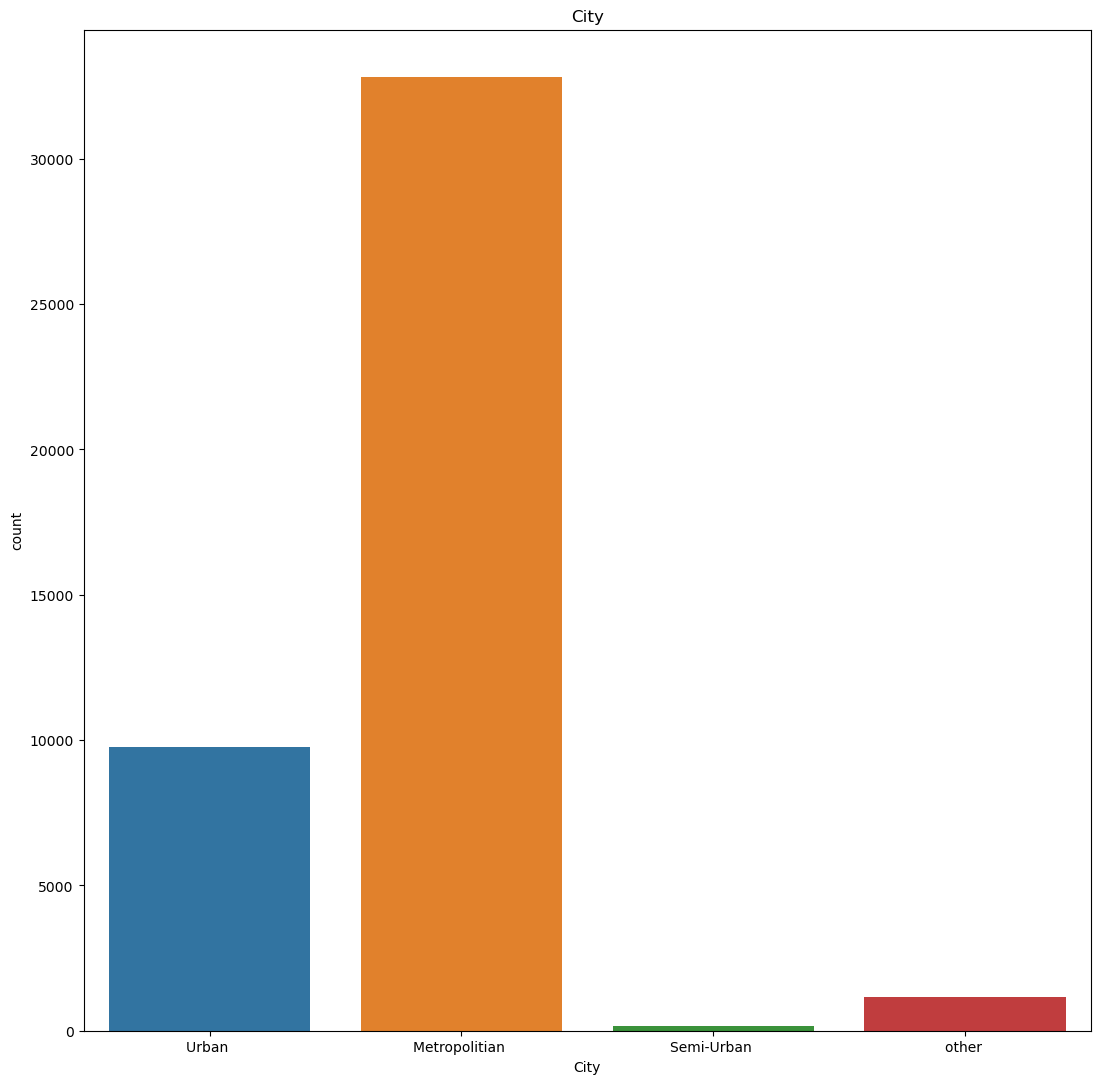

In [288]:
for i in cat_list:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)



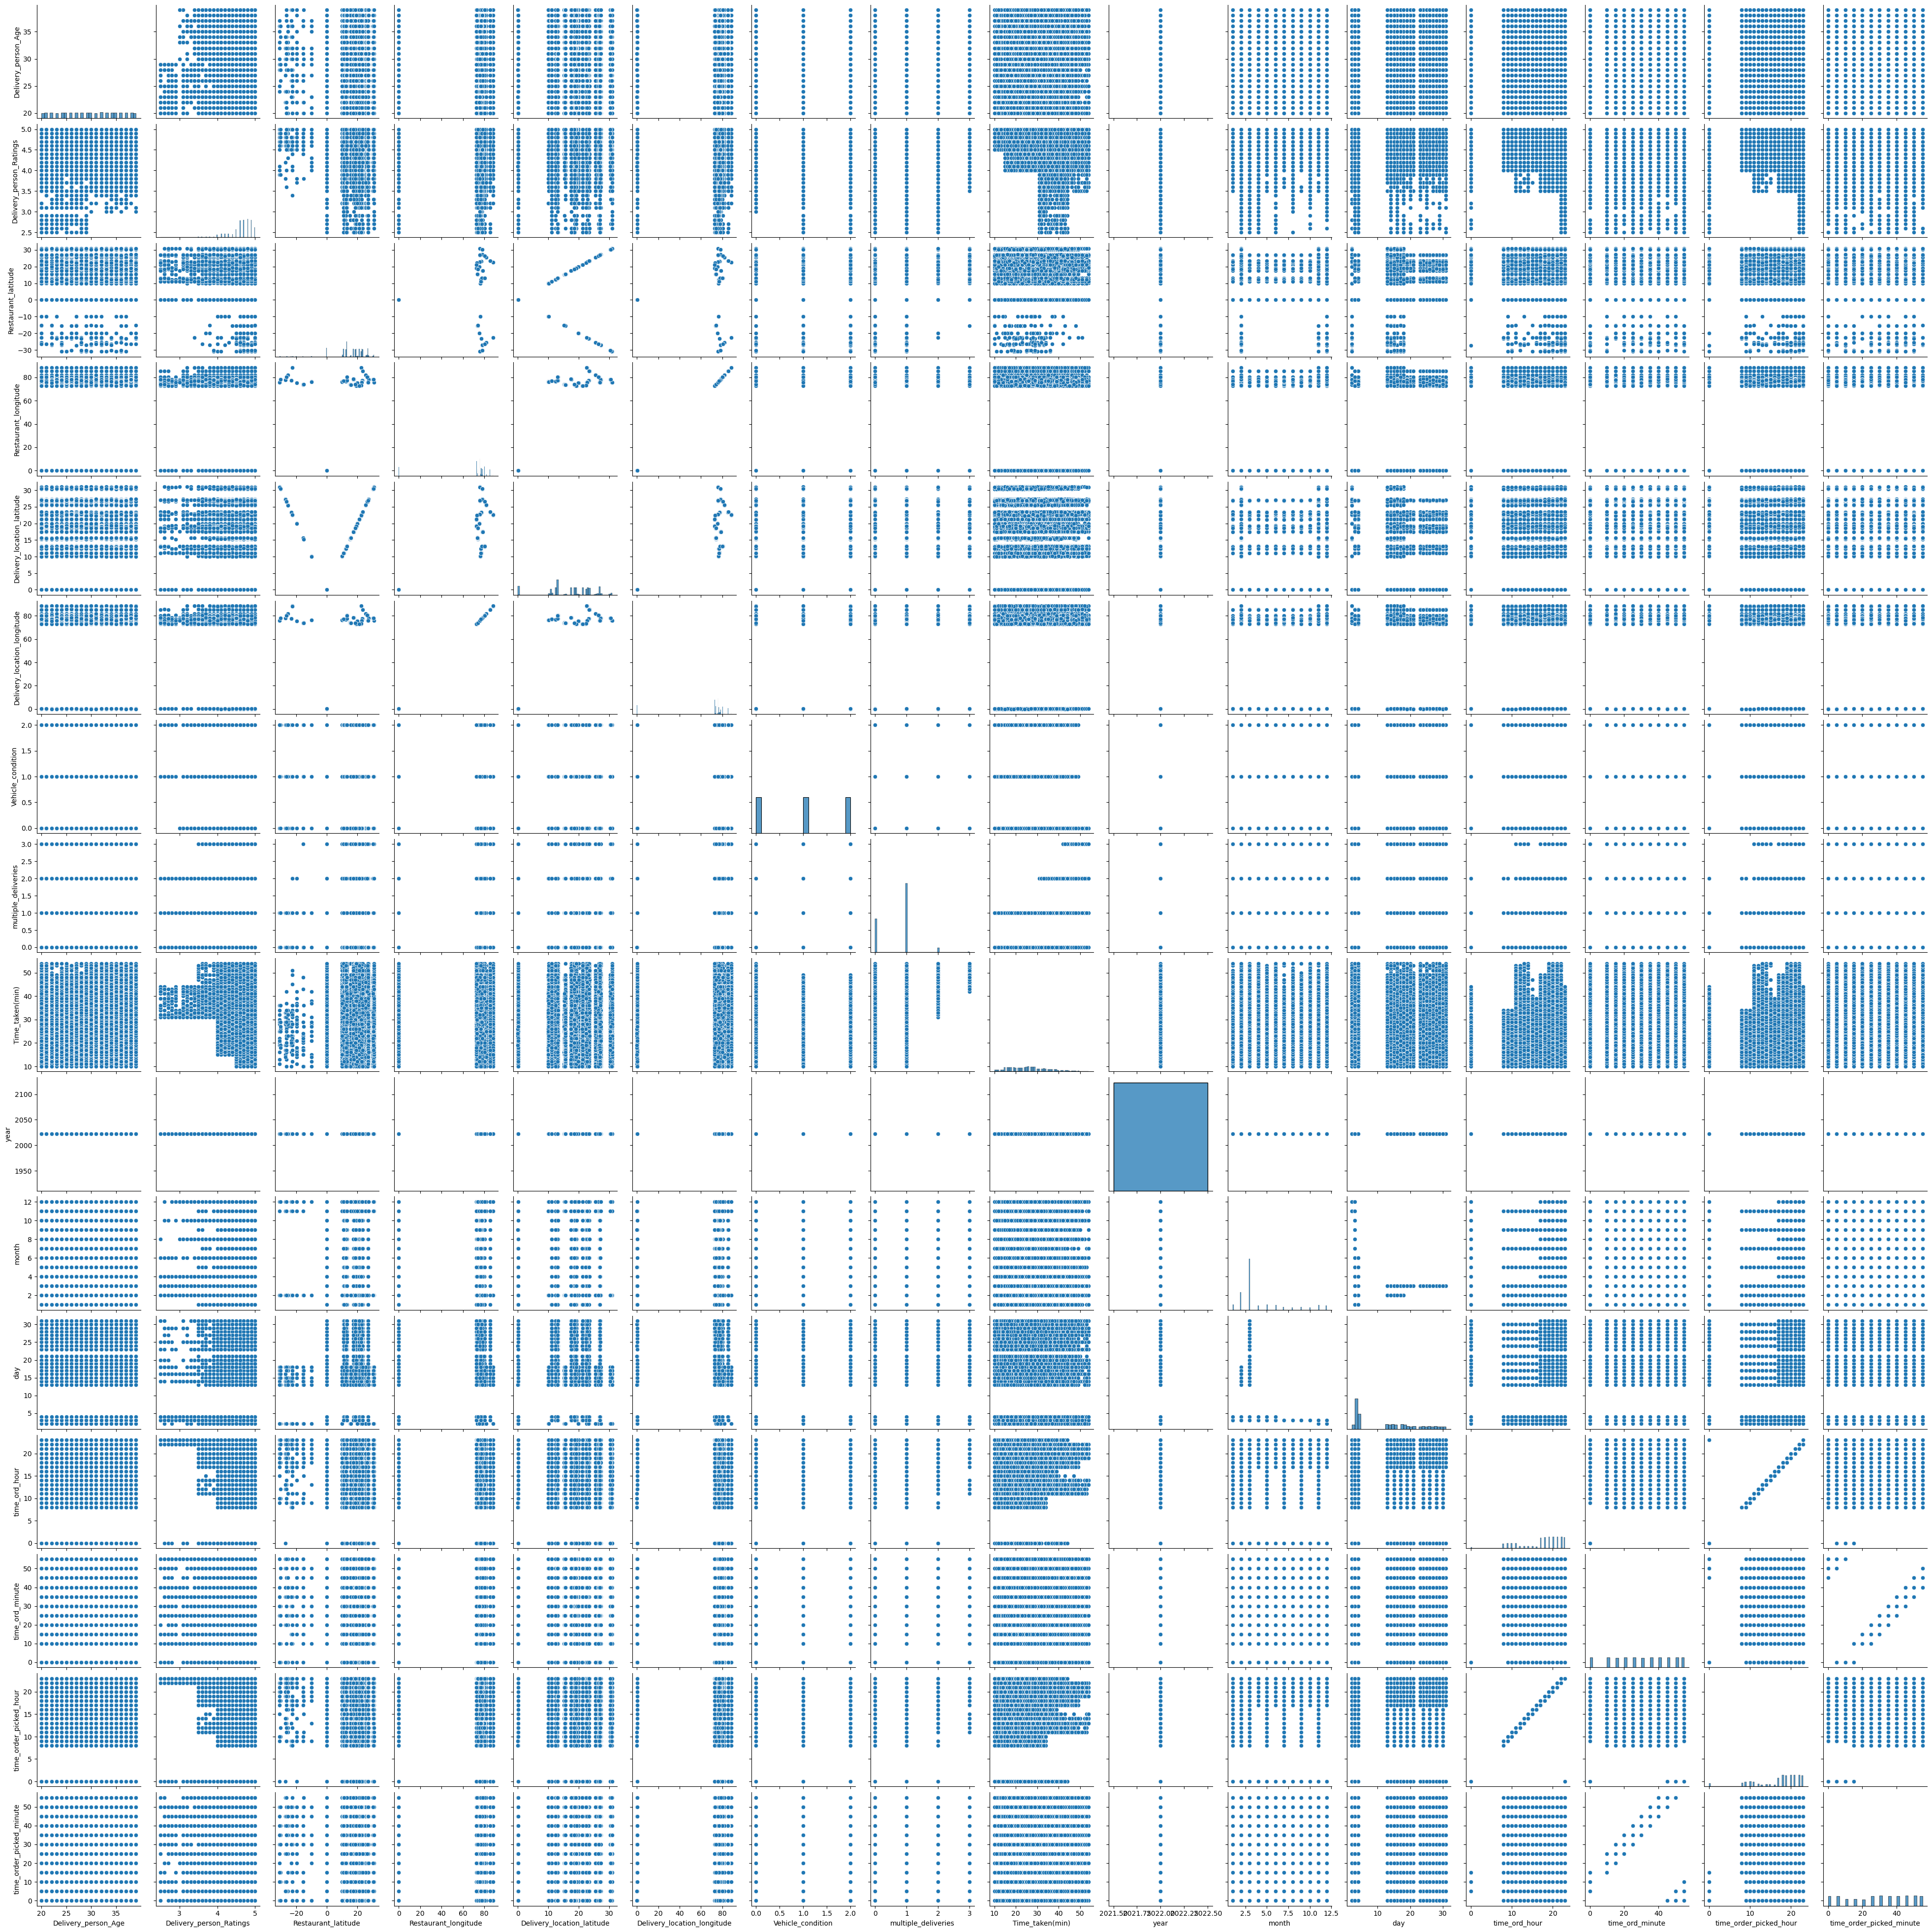

In [289]:
# sayısal değerler arasındaki grafik;

sns.pairplot(df.loc[:,num_list])



array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>,
        <Axes: title={'center': 'Restaurant_latitude'}>,
        <Axes: title={'center': 'Restaurant_longitude'}>],
       [<Axes: title={'center': 'Delivery_location_latitude'}>,
        <Axes: title={'center': 'Delivery_location_longitude'}>,
        <Axes: title={'center': 'Vehicle_condition'}>,
        <Axes: title={'center': 'multiple_deliveries'}>],
       [<Axes: title={'center': 'Time_taken(min)'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'time_ord_hour'}>,
        <Axes: title={'center': 'time_ord_minute'}>,
        <Axes: title={'center': 'time_order_picked_hour'}>,
        <Axes: title={'center': 'time_order_picked_minute'}>]],
      dtype=object)

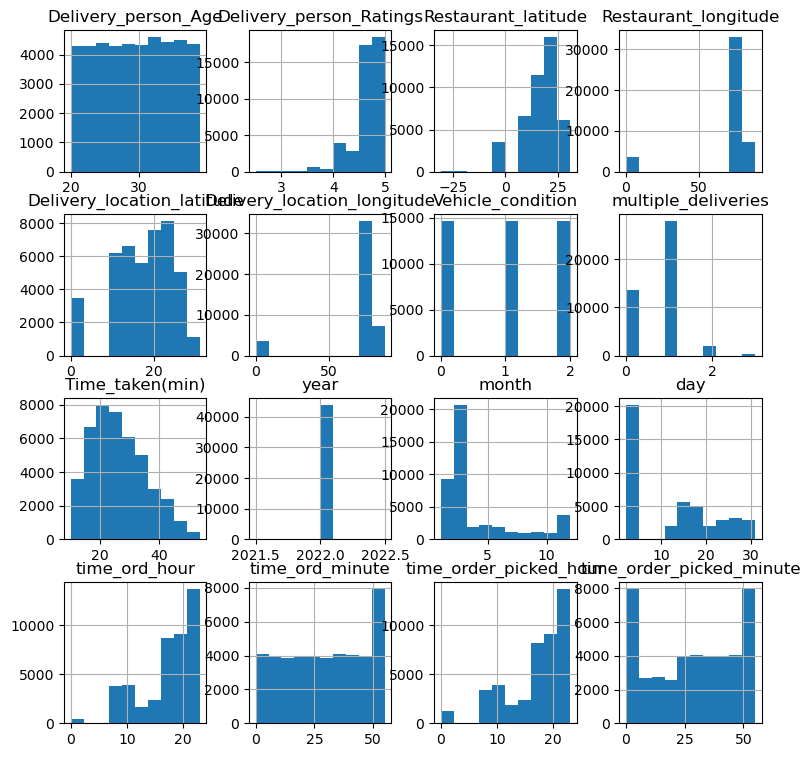

In [290]:
# histogram için;

df.hist(figsize=(9,9))


<Axes: xlabel='month', ylabel='Time_taken(min)'>

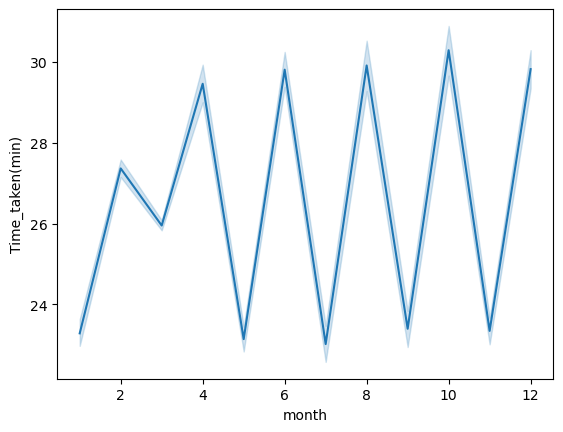

In [291]:
sns.lineplot(x=df.month,y=df["Time_taken(min)"],data=df)

In [292]:
# aylara  göre siparişlerin teslimat süreleri

<Axes: xlabel='day', ylabel='Time_taken(min)'>

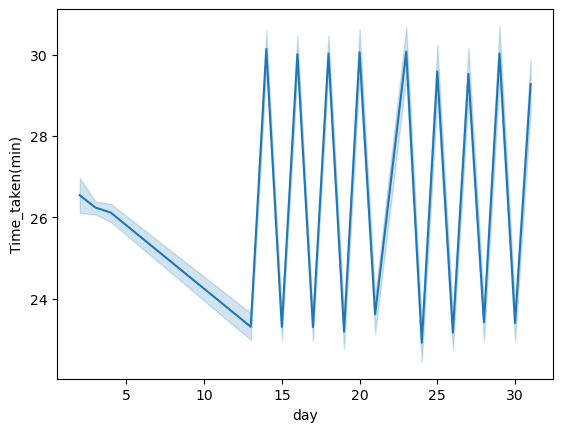

In [293]:
sns.lineplot(x=df.day,y=df["Time_taken(min)"],data=df)

In [294]:
# günlere  göre siparişlerin teslimat süreleri

<Axes: xlabel='time_order_picked_hour', ylabel='Time_taken(min)'>

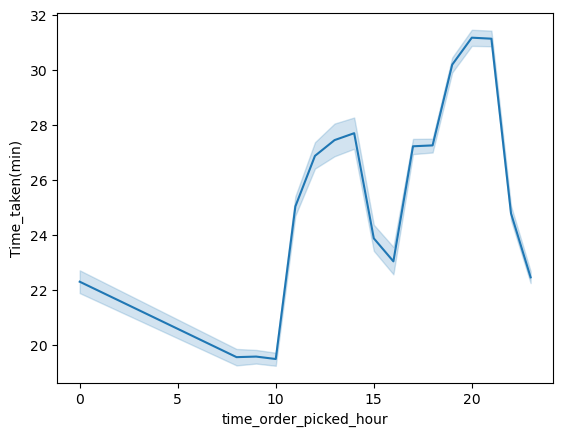

In [295]:
sns.lineplot(x=df.time_order_picked_hour,y=df["Time_taken(min)"],data=df)

In [296]:
# saatlere göre verilen siparişleri gözlemlemiş olduk

In [297]:
# en çok siparişler 19-20 saatlerinde verilmiş

### Encoding

In [298]:
test_df.select_dtypes("object")

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
1,Windy,Jam,Snack,motorcycle,No,Metropolitian
2,Stormy,Jam,Drinks,motorcycle,No,Metropolitian
3,Fog,Medium,Meal,scooter,No,Metropolitian
4,Sunny,Medium,Drinks,scooter,No,Metropolitian
5,Fog,Low,Drinks,motorcycle,No,Metropolitian
...,...,...,...,...,...,...
11393,Windy,Low,Snack,scooter,No,Metropolitian
11394,Sunny,Jam,Snack,scooter,No,Metropolitian
11395,Sandstorms,High,Drinks,scooter,No,Metropolitian
11397,Sandstorms,Medium,Meal,motorcycle,No,Metropolitian


In [299]:
df.select_dtypes("object")

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,Sunny,High,Snack,motorcycle,No,Urban
1,Stormy,Jam,Snack,scooter,No,Metropolitian
2,Sandstorms,Low,Drinks,motorcycle,No,Urban
3,Sunny,Medium,Buffet,motorcycle,No,Metropolitian
4,Cloudy,High,Snack,scooter,No,Metropolitian
...,...,...,...,...,...,...
45588,Windy,High,Meal,motorcycle,No,Metropolitian
45589,Windy,Jam,Buffet,motorcycle,No,Metropolitian
45590,Cloudy,Low,Drinks,scooter,No,Metropolitian
45591,Cloudy,High,Snack,motorcycle,No,Metropolitian


In [300]:
for i in cat_list:
    df[i] = df[i].factorize()[0]


In [301]:
for i in cat_list:
    test_df[i] = test_df[i].factorize()[0]


In [302]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
0,37,4.9,22.745049,75.892471,22.765049,75.912471,0,0,2,0,...,0,0,24,2022,3,19,11,30,11,45
1,34,4.5,12.913041,77.683237,13.043041,77.813237,1,1,2,0,...,0,1,33,2022,3,25,19,45,19,50
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,0,26,2022,3,19,8,30,8,45
3,38,4.7,11.003669,76.976494,11.053669,77.026494,0,3,0,2,...,0,1,21,2022,5,4,18,0,18,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3,0,1,0,...,0,1,30,2022,3,26,13,30,13,45


In [303]:
# kategorik değerleri  sayısal forma dönüştürdük

### Korelasyon Analizi

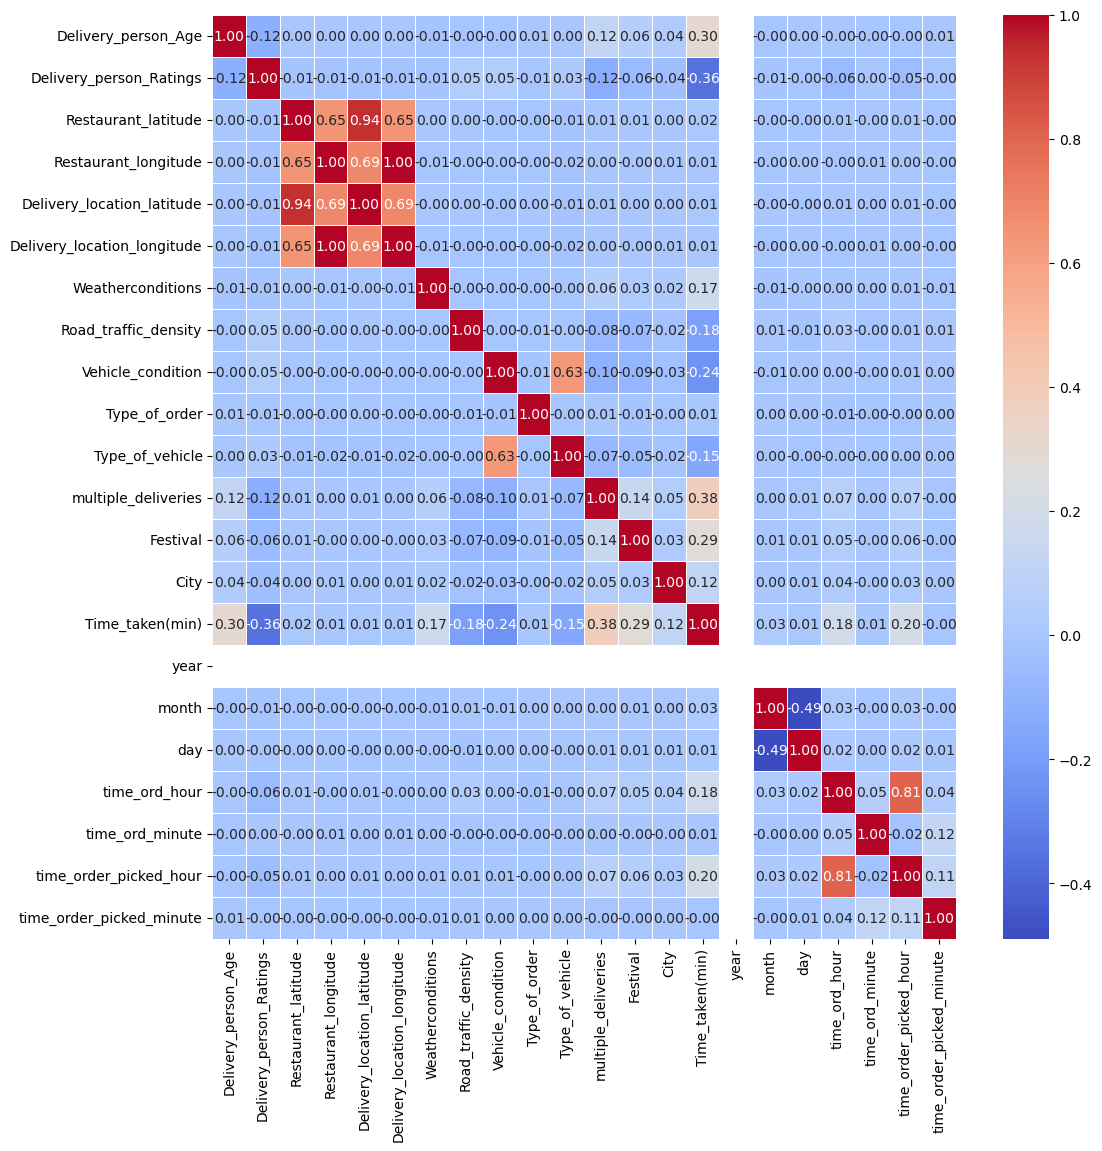

In [304]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

In [305]:
df.corr()["Time_taken(min)"].sort_values(ascending=False)



Time_taken(min)                1.000000
multiple_deliveries            0.379204
Delivery_person_Age            0.303005
Festival                       0.289269
time_order_picked_hour         0.202963
time_ord_hour                  0.184378
Weatherconditions              0.173302
City                           0.115673
month                          0.028792
Restaurant_latitude            0.015252
Delivery_location_latitude     0.014824
day                            0.012149
Delivery_location_longitude    0.008668
Restaurant_longitude           0.008110
Type_of_order                  0.006217
time_ord_minute                0.005209
time_order_picked_minute      -0.001122
Type_of_vehicle               -0.152382
Road_traffic_density          -0.182640
Vehicle_condition             -0.243111
Delivery_person_Ratings       -0.359412
year                                NaN
Name: Time_taken(min), dtype: float64

In [306]:

cor=df.corr()["Time_taken(min)"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with Time_taken(min)":cor.values})

,column,Correlation with Time_taken(min)
0,Time_taken(min),1.000000
1,multiple_deliveries,0.379204
2,Delivery_person_Age,0.303005
3,Festival,0.289269
4,time_order_picked_hour,0.202963
5,time_ord_hour,0.184378
6,Weatherconditions,0.173302
7,City,0.115673
8,month,0.028792
9,Restaurant_latitude,0.015252


In [307]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute
0,37,4.9,22.745049,75.892471,22.765049,75.912471,0,0,2,0,...,0,0,24,2022,3,19,11,30,11,45
1,34,4.5,12.913041,77.683237,13.043041,77.813237,1,1,2,0,...,0,1,33,2022,3,25,19,45,19,50
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,0,26,2022,3,19,8,30,8,45
3,38,4.7,11.003669,76.976494,11.053669,77.026494,0,3,0,2,...,0,1,21,2022,5,4,18,0,18,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3,0,1,0,...,0,1,30,2022,3,26,13,30,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,5,0,1,3,...,0,1,32,2022,3,24,11,35,11,45
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,5,1,0,2,...,0,1,36,2022,2,16,19,55,20,10
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,3,2,1,1,...,0,1,16,2022,11,3,23,50,0,5
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,3,0,0,0,...,0,1,26,2022,7,3,13,35,13,40


<a id="5"></a>
## 5.Modelling

In [308]:
X=df.drop("Time_taken(min)",axis=1)
y=df["Time_taken(min)"]

In [309]:
# verileri train-test olarak bölelim;

In [310]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.18,random_state=0)

In [311]:
X_train.shape

(35966, 21)

In [312]:
X_test.shape

(7896, 21)

In [313]:
# yüklü pşmayan kütüphaneleri yükleyelim;

In [314]:
!pip install catboost

In [315]:
!pip install lightgbm

In [316]:
!pip install xgboost

In [317]:
# bazı modellerimizin r2_score değerlerini karşılaştıralım (başarı ölçütü olarak r2 score değeri baz alınıyor) (Evaluation metric is r2_score)


In [319]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [320]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.072112
0:	learn: 8.9986739	total: 65ms	remaining: 1m 4s
1:	learn: 8.6652457	total: 71.7ms	remaining: 35.8s
2:	learn: 8.3583561	total: 78.1ms	remaining: 25.9s
3:	learn: 8.0755532	total: 84.6ms	remaining: 21.1s
4:	learn: 7.8397786	total: 90.3ms	remaining: 18s
5:	learn: 7.6017328	total: 97ms	remaining: 16.1s
6:	learn: 7.3646941	total: 104ms	remaining: 14.7s
7:	learn: 7.1867058	total: 110ms	remaining: 13.6s
8:	learn: 7.0239335	total: 116ms	remaining: 12.7s
9:	learn: 6.8751921	total: 121ms	remaining: 11.9s
10:	learn: 6.7297655	total: 126ms	remaining: 11.3s
11:	learn: 6.5756918	total: 133ms	remaining: 11s
12:	learn: 6.4546564	total: 138ms	remaining: 10.5s
13:	learn: 6.3521782	total: 143ms	remaining: 10.1s
14:	learn: 6.2548139	total: 148ms	remaining: 9.73s
15:	learn: 6.1540217	total: 154ms	remaining: 9.47s
16:	learn: 6.0674005	total: 159ms	remaining: 9.21s
17:	learn: 6.0025225	total: 164ms	remaining: 8.95s
18:	learn: 5.9408356	total: 169ms	remaining: 8.71s
19:	learn: 5.

In [321]:
models=[ridge,lasso,enet,knn,ada,svm,dtc,rf,xgb,gbm,lgb,catbost]

In [322]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=r2_score(y_test,y_pred)
    return accuary



In [323]:
for i in models:
    print(i,"Algorithm succed rate :",ML("Time_taken(min)",i))

Ridge() Algorithm succed rate : 0.48205366471363365
Lasso() Algorithm succed rate : 0.27546650765139113
ElasticNet() Algorithm succed rate : 0.27503023735959076
KNeighborsRegressor() Algorithm succed rate : 0.14731240531053058
AdaBoostRegressor() Algorithm succed rate : 0.5565589473579862
SVR() Algorithm succed rate : 0.009490614521940333
DecisionTreeRegressor() Algorithm succed rate : 0.5384680909968086
RandomForestRegressor() Algorithm succed rate : 0.7588367520916571
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

In [346]:
# xgboost ve catboost için yüksek başarı oranları yakaladık


### model tuning

In [326]:
!pip install optuna


In [328]:
# optuna kullanacağım

In [325]:
## 1.Xgboost

In [327]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler
 

In [329]:
def return_score(param):
    model=XGBRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=r2_score(y_test,y_pred)
    return acc

In [330]:
xgb?

Type:        XGBRegressor
String form:
XGBRegressor(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None,  <...> rs=100, n_jobs=None, num_parallel_tree=None,
           predictor=None, random_state=None, ...)
File:        /opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boostin

In [331]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,1000),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),

                

    }
    return(return_score(param))

In [333]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=100)


[I 2023-07-15 11:19:45,790] A new study created in memory with name: no-name-50dbb3e3-d644-427b-a49b-d64419f3f756
[I 2023-07-15 11:20:24,059] Trial 0 finished with value: 0.7586035172534255 and parameters: {'n_estimators': 399, 'max_depth': 12, 'learning_rate': 0.49399392911944373}. Best is trial 0 with value: 0.7586035172534255.
[I 2023-07-15 11:20:41,938] Trial 1 finished with value: 0.8021704132189323 and parameters: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.1914437131293722}. Best is trial 1 with value: 0.8021704132189323.
[I 2023-07-15 11:21:39,779] Trial 2 finished with value: 0.7750335604620517 and parameters: {'n_estimators': 366, 'max_depth': 15, 'learning_rate': 0.21278063461640473}. Best is trial 1 with value: 0.8021704132189323.
[I 2023-07-15 11:22:29,444] Trial 3 finished with value: 0.7951027903107267 and parameters: {'n_estimators': 633, 'max_depth': 8, 'learning_rate': 0.18774821968023517}. Best is trial 1 with value: 0.8021704132189323.
[I 2023-07-15 11

In [334]:
trial=study.best_trial
print("accuary:{}".format(trial.value))


accuary:0.8129950104935966


In [335]:
# başarı oranımız artmış oldu

In [336]:
#best hyperparametrs
trial.params

{'n_estimators': 378, 'max_depth': 8, 'learning_rate': 0.0681643817417908}

In [337]:
optuna.visualization.plot_param_importances(study)

In [338]:
# en çok etki eden hiperparametre n_estimator yani ağaç sayısı

In [349]:
xgb_tun=XGBRegressor(n_estimators=378, max_depth= 8, learning_rate= 0.0681643817417908).fit(X_train,y_train)

In [350]:
y_pred=xgb_tun.predict(X_test)
r2_score(y_test,y_pred)

0.8129950104935966

In [347]:
# şimdi sonçları test edelim;

In [354]:
xgb_tun.predict(test_df)[0:100]

array([36.154217, 29.386343, 22.012173, 40.138496, 18.409702, 18.111141,
       20.89479 , 36.86874 , 18.0599  , 21.395084, 24.660303, 17.281229,
       18.757204, 27.311241, 29.418463, 31.140112, 37.773415, 31.17535 ,
       23.073288, 36.064667, 31.547161, 28.307747, 28.266497, 26.350029,
       22.773571, 27.593481, 33.99344 , 19.790543, 14.913929, 16.426638,
       24.201584, 15.373054, 16.893702, 28.985813, 33.73975 , 20.087376,
       42.427845, 17.819328, 19.033745, 21.477905, 28.110859, 19.654787,
       21.338047, 24.489729, 35.96806 , 39.460155, 16.908653, 33.19852 ,
       22.57755 , 19.794733, 31.702353, 21.254139, 33.173344, 24.506838,
       33.449673, 41.36008 , 29.983183, 19.783773, 19.084991, 14.608494,
       44.81565 , 25.703249, 36.899677, 43.058018, 43.980686, 25.258392,
       27.332167, 34.490467, 23.81042 , 27.314335, 31.533665, 23.449854,
       12.639875, 19.003164, 22.130407, 20.49846 , 31.410645, 38.985565,
       21.641478, 15.721122, 31.183258, 18.155434, 

In [358]:
test=test_df.iloc[0:7896]

In [359]:
test['Time_taken(min)'] = xgb_tun.predict(X_test)


In [360]:
test

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,year,month,day,time_ord_hour,time_ord_minute,time_order_picked_hour,time_order_picked_minute,Time_taken(min)
1,28,4.6,12.975377,77.696664,13.085377,77.806664,0,0,0,0,...,0,0,2022,3,29,20,30,20,35,45.973835
2,23,4.5,26.911378,75.789034,27.001378,75.879034,1,0,0,1,...,0,0,2022,10,3,19,35,19,45,21.456606
3,21,4.8,26.766536,75.837333,26.856536,75.927333,2,1,1,2,...,0,0,2022,2,4,17,15,17,20,27.834915
4,31,4.6,12.986047,80.218114,13.096047,80.328114,3,1,2,1,...,0,0,2022,3,27,18,25,18,40,13.194530
5,26,4.7,15.569600,73.742294,15.579600,73.752294,2,2,0,1,...,0,0,2022,2,15,9,45,9,55,15.781892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,26,5.0,26.921411,75.793604,26.991411,75.863604,5,2,1,2,...,0,0,2022,3,31,22,45,23,0,23.433659
8218,28,4.7,11.022298,76.998349,11.072298,77.048349,1,0,0,1,...,0,0,2022,5,4,19,55,20,10,36.084782
8219,20,4.6,13.081878,80.248519,13.161878,80.328519,1,1,0,0,...,0,0,2022,3,16,18,20,18,35,28.790211
8220,36,4.7,11.022169,76.999594,11.072169,77.049594,4,0,1,0,...,0,0,2022,3,26,20,15,20,25,24.435730


In [361]:
# test verileri için tahmin değerlerini girmiş olduk.(belirli kısım için )